![aacbanner](https://i.pinimg.com/originals/72/f6/df/72f6dfa7856f808ba6ff9a2074c4cfa0.gif)

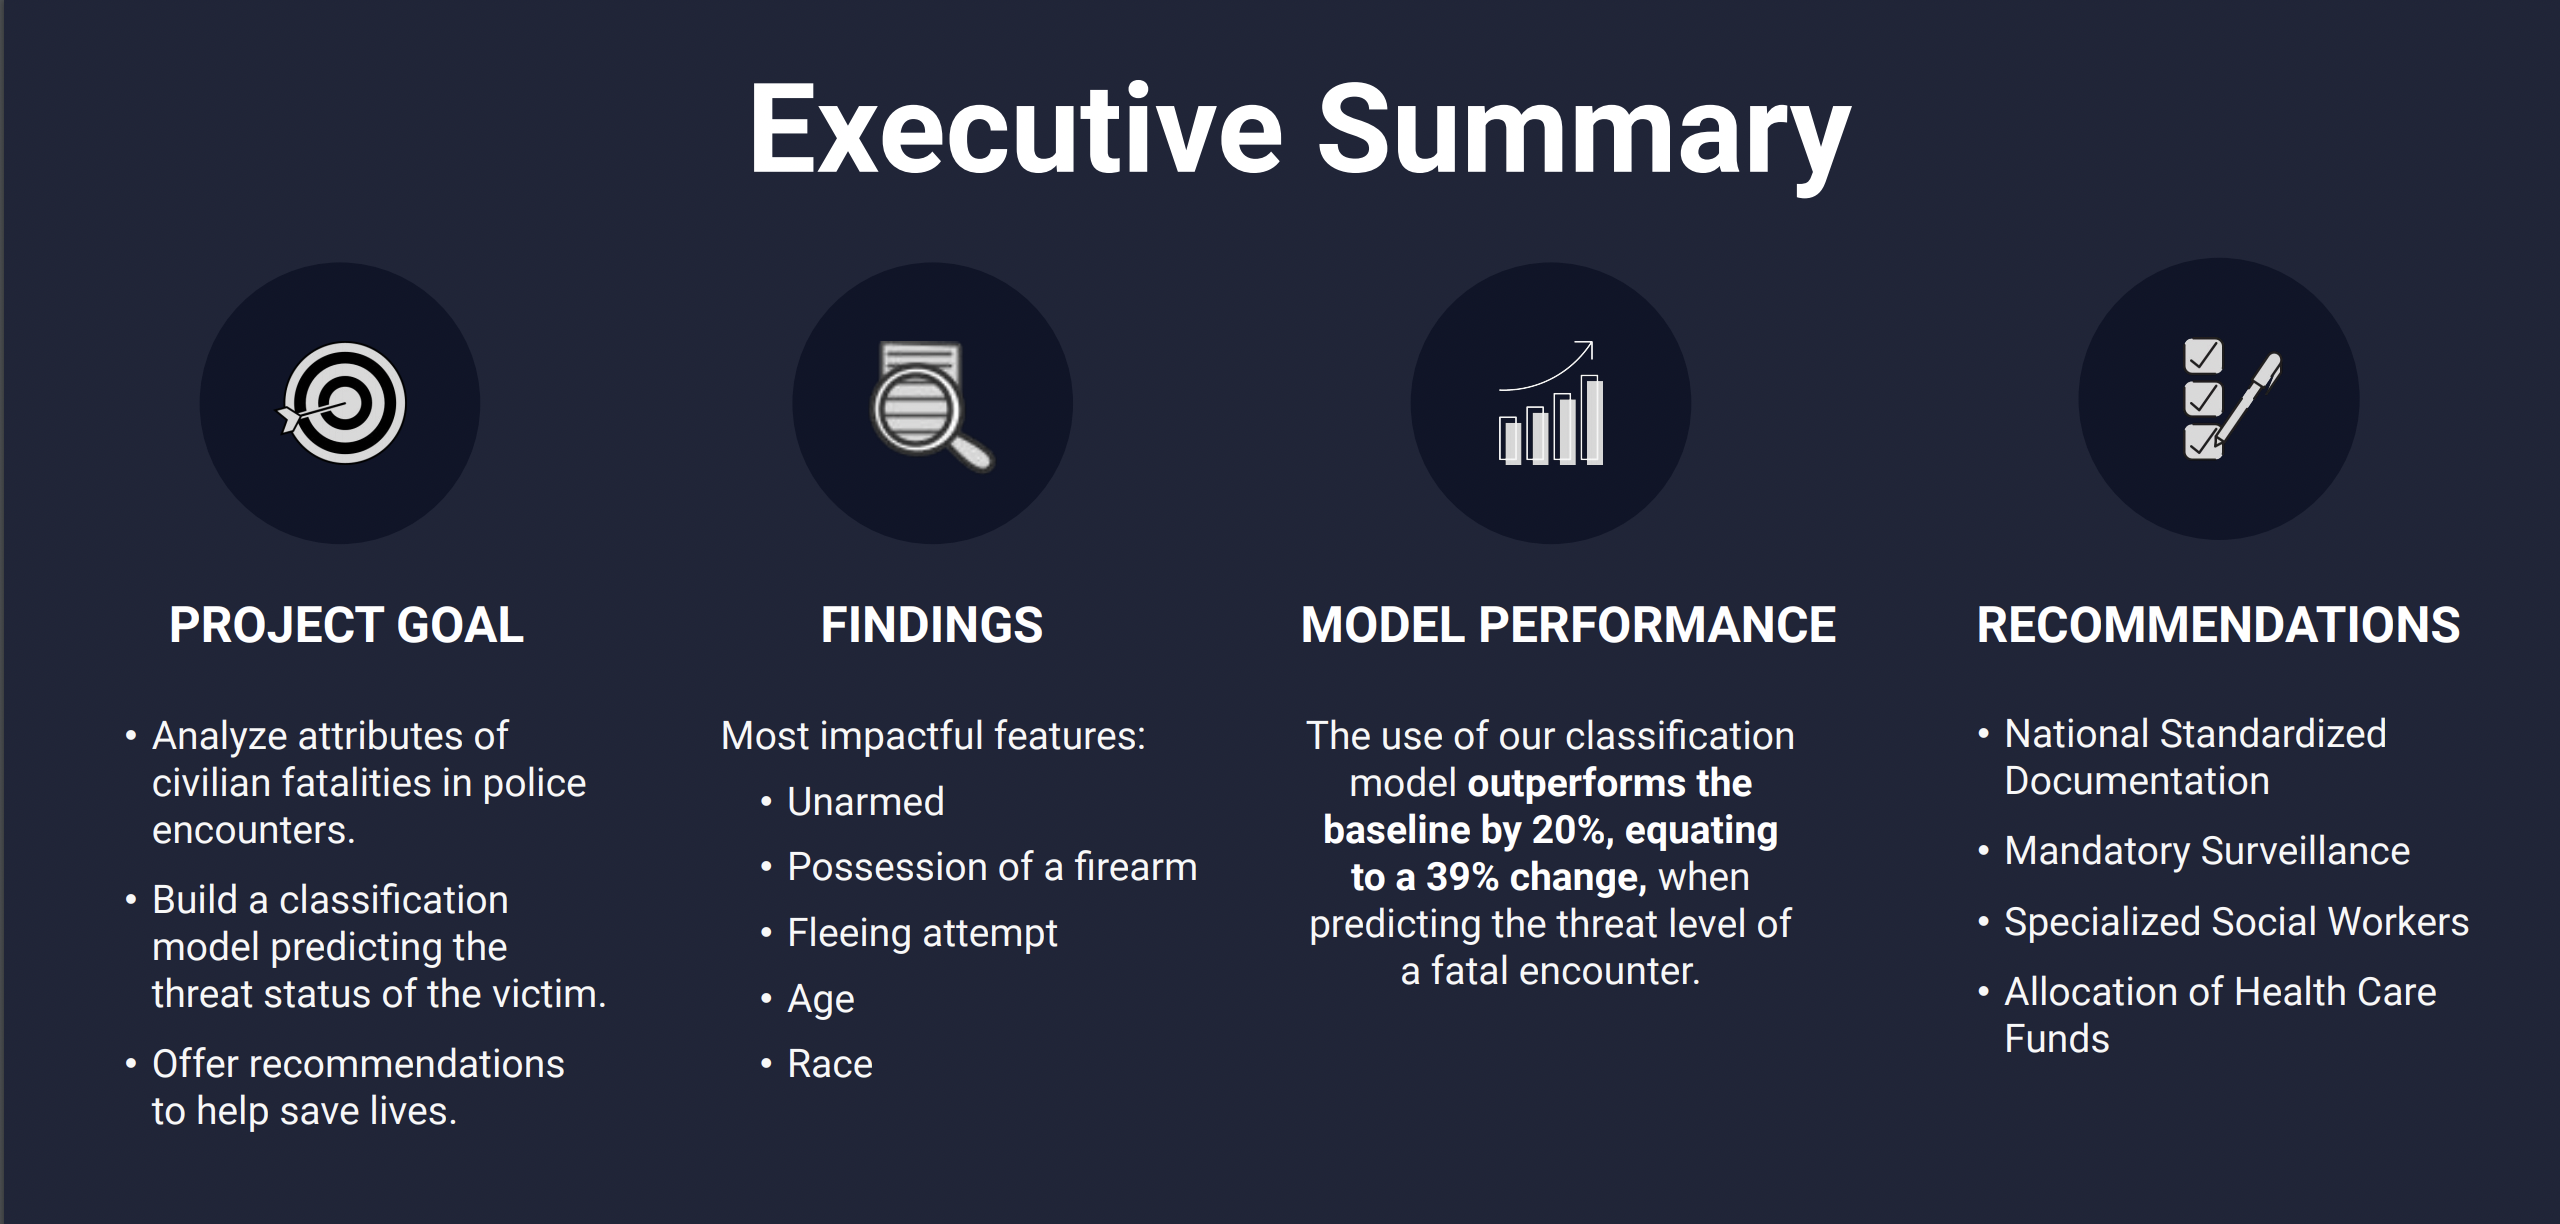

# Project Description and Goals

Across the United States, there are police altercations that result in deadly outcomes. A great deal of data on these fatal occurrences exists and it includes information on fatalities caused by police, whether they were on-duty, off-duty, criminal, line-of-duty, local, federal, intentional, or accidental. For our capstone, we address the issue of police violence that has become a heated topic throughout the country. As a team, we attempt to help law enforcement agencies identify risk factors so they may step in before risk transforms into actual harm. 


Our project aims to research what attributes surround fatal police-related encounters and to analyze the attributes about these incidents that may be leading to the fatalities. Two open-sourced datasets we acquired:

> #### [Mapping Police Violence](https://mappingpoliceviolence.org/aboutthedata) with over 9000 police killings from January 2013 to May 2021.
> For the first iteration, we took the target attributes (the threat level of the victim) and built a model around it to predict if the victim is classified as being an attacker or a non-attacker based on the other top attributes in the MPV dataset.
>

> #### [Fatal Encounters](https://fatalencounters.org/) has information on over 30,000 records from January 2000 to May 2021.
> For the second iteration, we've created a similar classification model to predict the threat level of the victim. Although, this iteration, we had a multiclassification of: threatening, non-threatening, or ambiguous, based on the other top attributes in the FE dataset. 
>


Our hope is to shed light on our current situation, create recommendations to save more lives, and to improve the emergency response process currently used across the United States. 




<a id='toc'></a>



***


### Workflow

#### [Imports](#imports)
#### [Acquire Data](#acquire-data)
#### [Prepare and Split Data](#prepare-and-split-data)
#### [Explore Data](#explore-data)
- [Visualizations](#visualizations)
- [Hypothesis Testing](#hypothesis-testing)

#### [Modeling](#modeling)
- [Feature Importance](#feature-importance)
- [Identify Baseline](#identify-baseline)
- [Model on Train](#model-on-train)
- [Model on Validate](#model-on-validate)
- [Model on Test](#model-on-test)

#### [2nd Iteration: Acquire Data](#2nd-iteration-acquire-data)
#### [2nd Iteration: Prepare and Split Data](#2nd-iteration-prepare-and-split-data)
#### [2nd Iteration: Explore Data](#2nd-iteration-explore-data)
- [2nd Iteration: Visualizations](#2nd-iteration-visualizations)
- [2nd Iteration: Hypothesis Testing](#2nd-iteration-hypothesis-testing)

#### [2nd Iteration: Modeling](#2nd-iteration-modeling)
- [2nd Iteration: Feature Importance](#2nd-iteration-feature-importance)
- [2nd Iteration: Identify Baseline](#2nd-iteration-identify-baseline)
- [2nd Iteration: Model on Train](#2nd-iteration-train)
- [2nd Iteration: Model on Validate](#2nd-iteration-validate)
- [2nd Iteration: Model on Test](#2nd-iteration-test)

#### [Drivers](#drivers)

#### [Conclusion](#conclusion)

___
# <a name="imports"></a>Imports 
Import all necessary libraries and functions. 

In [1]:
import pandas as pd
import numpy as np

# Helper Functions.
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import graphviz
from graphviz import Graph

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# Split data
from sklearn.model_selection import train_test_split

# Explore NLP
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.feature_selection import RFE

# Encode Variables
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Evaluate models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from yellowbrick.classifier import ROCAUC

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

 [Jump to Table of Contents](#toc)
___
# <a name="acquire-data"></a>Acquire Data
We began by bringing in our initial [Mapping Police Violence](https://mappingpoliceviolence.org) Excel dataset

In [2]:
# reads data from Mapping Police Violence website's downloaded dataset
df = pd.read_excel('data.xlsx')
df.head()

Victim's name Victim's age Victim's gender    Victim's race  \
0         Jacob Wood           28            Male  Native American   
1  Rodney Applewhite           25            Male            Black   
2        Bennie Biby           44            Male            White   
3       Joey Hoffman           40            Male     Unknown Race   
4        Paul Bailey           21            Male            White   

                              URL of image of victim  \
0  https://fatalencounters.org/wp-content/uploads...   
1  https://fatalencounters.org/wp-content/uploads...   
2  https://fatalencounters.org/wp-content/uploads...   
3                                                NaN   
4  https://fatalencounters.org/wp-content/uploads...   

  Date of Incident (month/day/year)  Street Address of Incident        City  \
0                        2021-04-14               Scovil Street   Mars Hill   
1                        2020-11-19          Manzano Expressway   Los Lunas   
2                        2020-10-28           295 Forest Circle       Cadiz   
3                        2020-10-19  Lehigh Street and W 7th St  Jim Thorpe   
4                        2020-10-17           2423 Stillwell Rd  Davisville   

  State  Zipcode  ... Off-Duty Killing?  \
0    ME   4758.0  ...               NaN   
1    NM  87031.0  ...               NaN   
2    KY  42211.0  ...               NaN   
3    PA  18229.0  ...               NaN   
4    WV  26142.0  ...               NaN   

  Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )  \
0                                              Rural                                                                                                                           
1                                              Rural                                                                                                                           
2                                              Rural                                                                                                                           
3                                              Rural                                                                                                                           
4                                              Rural                                                                                                                           

   MPV ID Fatal Encounters ID       Encounter Type (DRAFT)  \
0  9105.0             30036.0                 None/Unknown   
1  8631.0             29233.0                 Traffic Stop   
2  8568.0             29037.0  Mental Health/Welfare Check   
3  8532.0             28983.0         Domestic Disturbance   
4  8521.0             28975.0  Mental Health/Welfare Check   

     Initial Reported Reason for Encounter (DRAFT)  \
0                                          unknown   
1                                Traffic violation   
2                                 Erratic behavior   
3  Domestic Disturbance-intimate partner (married)   
4                 Noise complaint/Erratic behavior   

  Names of Officers Involved (DRAFT) Race of Officers Involved (DRAFT)  \
0                         Isaac Ward                               NaN   
1                      Gene Gonzales                               NaN   
2                        Aaron Acree                               NaN   
3                                NaN                               NaN   
4                              Allen                               NaN   

  Known Past Shootings of Officer(s) (DRAFT) Call for Service? (DRAFT)  
0                                        NaN                       Yes  
1                                        NaN                        No  
2                                        NaN                       Yes  
3                      


### Initial Data Summarization
Our first look and feel for the data.




In [3]:
# rows and columns
df.shape

(9147, 35)

In [4]:
# list of column names and data types with information
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9147 entries, 0 to 9146
Columns: 35 entries, Victim's name to Call for Service? (DRAFT)
dtypes: datetime64[ns](1), float64(4), object(30)
memory usage: 2.4+ MB


In [5]:
# check nulls
df.isnull().sum()

Victim's name                                                                                                                                                                    0
Victim's age                                                                                                                                                                     9
Victim's gender                                                                                                                                                                 10
Victim's race                                                                                                                                                                    0
URL of image of victim                                                                                                                                                        4265
Date of Incident (month/day/year)                                                                        

In [6]:
# specify useless columns and what to exclude for counts
useless_columns = df.columns[35:]
exclusions = ["Victim's name", 
              "URL of image of victim", 
              "Date of Incident (month/day/year)", 
              "Street Address of Incident", 
              "City", "State", "Zipcode", "County", 
              "Agency responsible for death", "ORI Agency Identifier (if available)", 
              "A brief description of the circumstances surrounding the death", 
              "Link to news article or photo of official document", 
              "Link to news article or photo of official document", 
              "WaPo ID (If included in WaPo database)", 
              "MPV ID", 
              "Fatal Encounters ID", 
              "Names of Officers Involved (DRAFT)"]

# getting value counts for specific columns
for column in df.columns:
    if column not in exclusions and column not in useless_columns:
        print(column.upper())
        print(df[column].value_counts())
        print("-------------------------------------")

VICTIM'S AGE
Unknown    330
25         299
27         294
31         290
28         289
          ... 
107          1
95           1
88           1
85           1
40s          1
Name: Victim's age, Length: 89, dtype: int64
-------------------------------------
VICTIM'S GENDER
Male           8668
Female          453
Transgender       9
Unknown           6
Male              1
Name: Victim's gender, dtype: int64
-------------------------------------
VICTIM'S RACE
White                     3993
Black                     2306
Hispanic                  1631
Unknown Race               896
Asian                      135
Native American            130
Pacific Islander            52
Unknown race                 2
Hispanic                     1
Asian/Pacific Islander       1
Name: Victim's race, dtype: int64
-------------------------------------
CAUSE OF DEATH
Gunshot                                    8434
Gunshot, Taser                              273
Taser                                     

------------------------------------------------------
------------------------------------------------------


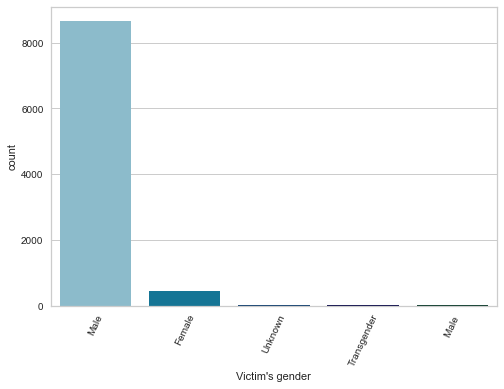

------------------------------------------------------
------------------------------------------------------


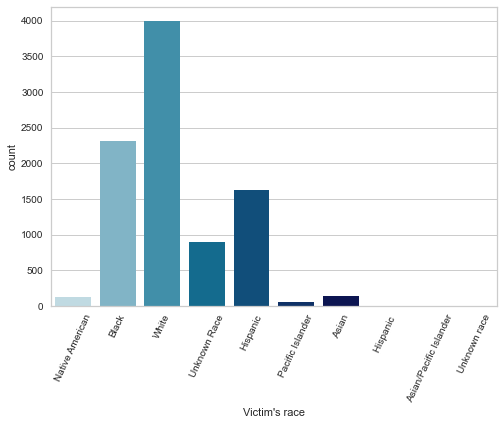

------------------------------------------------------
------------------------------------------------------


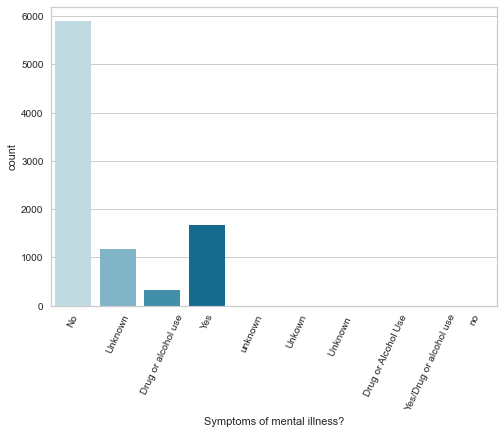

------------------------------------------------------
------------------------------------------------------


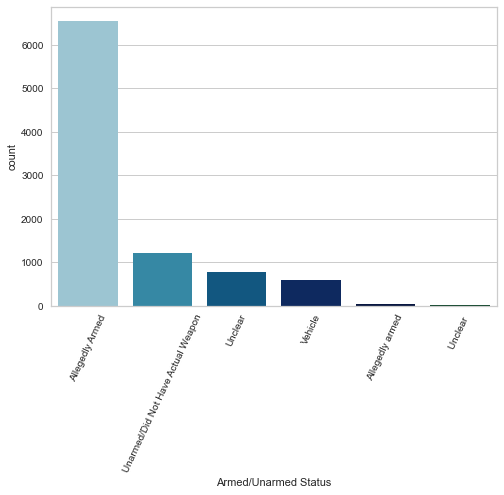

------------------------------------------------------
------------------------------------------------------


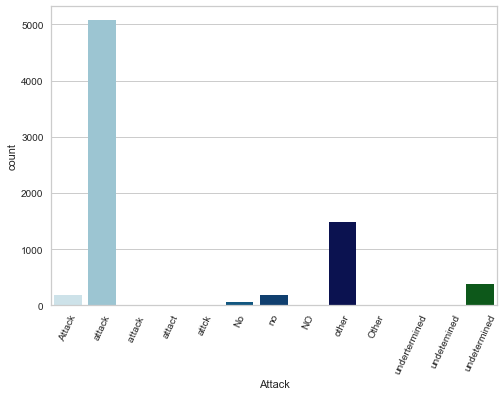

------------------------------------------------------
------------------------------------------------------


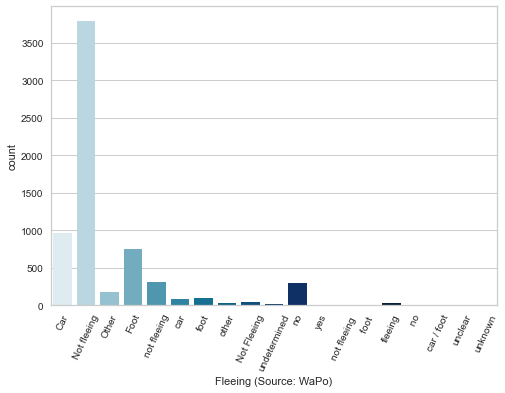

------------------------------------------------------
------------------------------------------------------


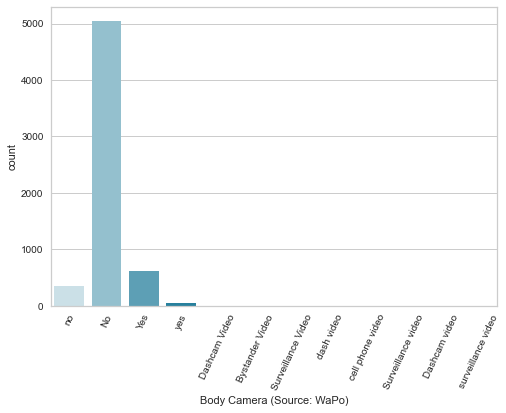

------------------------------------------------------
------------------------------------------------------


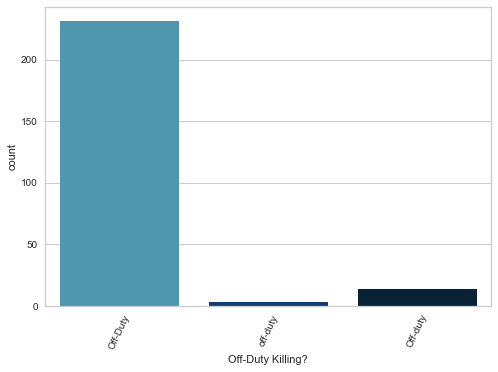

------------------------------------------------------
------------------------------------------------------


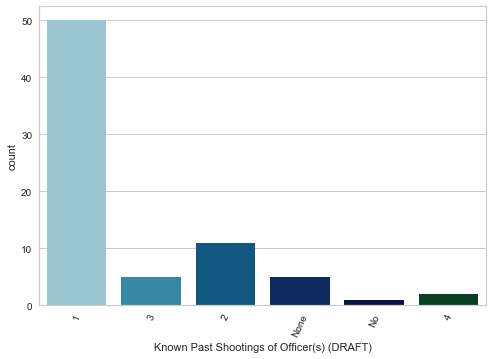

------------------------------------------------------
------------------------------------------------------


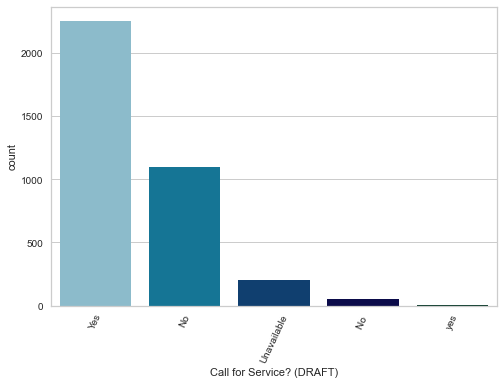

In [7]:
# specify more columns to exclude for univariate distributions
more_exclusions = ["Victim's age", 
                   "Cause of death", 
                   "Official disposition of death (justified or other)", 
                   "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)", 
                   "Encounter Type (DRAFT)", 
                   "Initial Reported Reason for Encounter (DRAFT)", 
                   "Criminal Charges?",
                   "Race of Officers Involved (DRAFT)", 
                   "Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )"]

# univariate distributions
for column in df.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df[column], data=df, palette = 'ocean_r')
        print("------------------------------------------------------")
        print("------------------------------------------------------")
        plt.xticks(rotation=65)
        plt.show()



<div class="alert alert-block alert-success">


### Takeaways
- There are a couple of unnecessary columns (begin with `Unnamed:`).
- Messy column names need to be renamed for better readability.
- A lot of columns are not needed due to nulls/unusable and will need to be dropped. 
- Most values in each column have a wide variety of text variation. These should be lowercased, stripped, and grouped. 
- Many nulls in dataset that need to be filled in or dropped.
- Dummy variables and encoding needs to be done to pretty much all of the dataset in order to model/evaluate. 
- Possibly a good idea to create age bins.
- Possible exploration with time series. Set `Date of Incident` as datetime index?

</div>


 [Jump to Table of Contents](#toc)
___
# <a name="prepare-and-split-data"></a>Prepare and Split Data

In [8]:
# grab cleaned data frame from wrangle.py
df = w.wrangle_data(cached=False)
df.head()

age gender             race       date        city state  zipcode  \
0   28   male  native american 2021-04-14   mars hill    me   4758.0   
1   25   male            black 2020-11-19   los lunas    nm  87031.0   
2   44   male            white 2020-10-28       cadiz    ky  42211.0   
4   21   male            white 2020-10-17  davisville    wv  26142.0   
5   76   male     unknown race 2019-12-29     byhalia    ms  38611.0   

      county                 agency_responsible cause_of_death  ... age_bins  \
0  aroostook  aroostook county sheriff's office        gunshot  ...    25-34   
1   valencia           new mexico state police         gunshot  ...    25-34   
2      trigg  trigg county sheriff's department        gunshot  ...    35-44   
4       wood   wood county sheriff's department        gunshot  ...    18-24   
5     desoto     desoto county sheriff's office        gunshot  ...      65+   

  unknown under 12 12-17 18-24 25-34  35-44 45-54  55-64 65+  
0       0        0     0     0     1      0     0      0   0  
1       0        0     0     0     1      0     0      0   0  
2       0        0     0     0     0      1     0      0   0  
4       0        0     0     1     0      0     0      0   0  
5       0        0     0     0     0      0     0      0   1  

[5 rows x 64 columns]

In [9]:
# double check rows and columns
df.shape

(6875, 64)

In [10]:
# double check no nulls
df.isnull().sum()

age       0
gender    0
race      0
date      0
city      0
         ..
25-34     0
35-44     0
45-54     0
55-64     0
65+       0
Length: 64, dtype: int64

In [11]:
# double check data types
df.dtypes

age                int64
gender            object
race              object
date      datetime64[ns]
city              object
               ...      
25-34              uint8
35-44              uint8
45-54              uint8
55-64              uint8
65+                uint8
Length: 64, dtype: object

In [12]:
# split the data using the split function in explore.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

# check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

# work with training data
train.head()

overall shape of dataframe: (6875, 64)
train: (3850, 64)
validate: (1650, 64)
test: (1375, 64)


age  gender          race       date           city state  zipcode  \
1853   17  female         white 2019-07-05        anaheim    ca  92806.0   
5119   58    male         white 2013-08-18     bluff city    tn  37618.0   
583    36    male         white 2018-01-12  cave junction    or  97523.0   
3674   65    male  unknown race 2020-03-08     montgomery    al  36117.0   
2487   26    male         white 2017-08-18     fairchance    pa  15436.0   

          county                                 agency_responsible  \
1853      orange                        fullerton police department   
5119    sullivan                   sullivan county sheriff's office   
583    josephine  josephine county sheriff's office, oregon stat...   
3674  montgomery                       montgomery police department   
2487     fayette                          pennsylvania state police   

     cause_of_death  ... age_bins unknown under 12 12-17 18-24 25-34  35-44  \
1853        gunshot  ...    12-17       0        0     1     0     0      0   
5119        gunshot  ...    55-64       0        0     0     0     0      0   
583         gunshot  ...    35-44       0        0     0     0     0      1   
3674        gunshot  ...      65+       0        0     0     0     0      0   
2487        gunshot  ...    25-34       0        0     0     0     1      0   

     45-54  55-64 65+  
1853     0      0   0  
5119     0      1   0  
583      0      0   0  
3674     0      0   1  
2487     0      0   0  

[5 rows x 64 columns]



<div class="alert alert-block alert-success">


### Takeaways
- About 1/3 of our data has been dropped due to missing information/nulls. 
- Data is prepped/split and ready to be explored, modeled, and evaluated.
    
</div>

 [Jump to Table of Contents](#toc)
___
# <a name="explore-data"></a>Explore Data
Address questions posed in planning


## <a name="visualizations"></a>• Visualizations

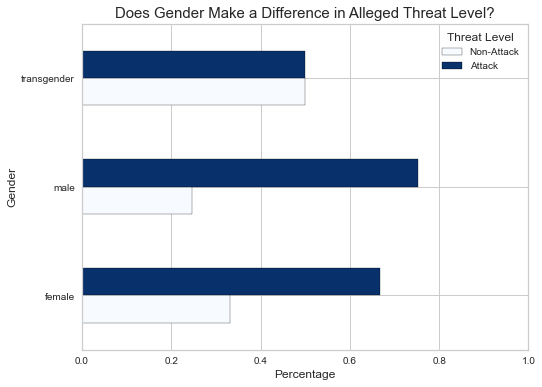

alleged_threat_lvl       0.0       1.0
gender                                
female              0.331522  0.668478
male                0.246452  0.753548
transgender         0.500000  0.500000

In [13]:
# visualize gender vs alleged threat level
ax = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Gender Make a Difference in Alleged Threat Level?", fontsize = 15)
plt.ylabel("Gender", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.gender, train.alleged_threat_lvl, normalize = 'index')
percentages



<div class="alert alert-block alert-success">


### Takeaways
- Highest percentage of non-attacks is transgender. Second highest is female.
- Highest percentage of attacks are male. Second highest is female.
- Transgender is equally likely to have an attack or non-attack threat level.
- Males appear to have the least amount of a non-attack threat level.
    
</div>

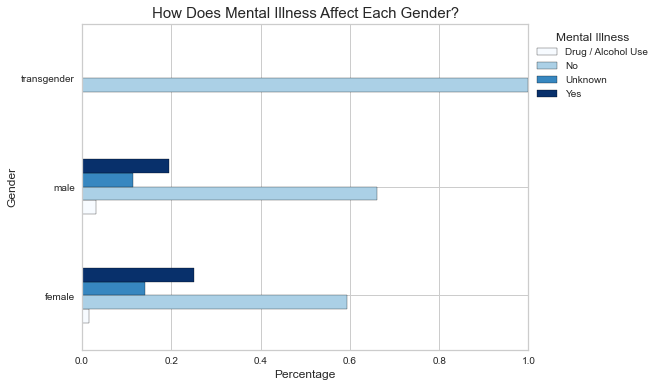

mental_illness  drug or alcohol use        no   unknown       yes
gender                                                           
female                     0.016304  0.592391  0.141304  0.250000
male                       0.030295  0.660753  0.114629  0.194323
transgender                0.000000  1.000000  0.000000  0.000000

In [14]:
# visualize mental illness per gender
ax = pd.crosstab(train.gender, train.mental_illness, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Drug / Alcohol Use', 'No', 'Unknown', 'Yes'], 
          bbox_to_anchor=(1,1), 
          title='Mental Illness')

# customize chart
plt.title("How Does Mental Illness Affect Each Gender?", fontsize = 15)
plt.ylabel("Gender", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.gender, train.mental_illness, normalize = 'index')
percentages



<div class="alert alert-block alert-success">

### Takeaways
- Males are most often categorized as not having a mental illness, however, they have a high threat level (according to previous visual). 
- Transgender appear to have an equal percentage in having/not having a mental illness. 
- Both male and female genders have higher percentages of no mental illness. Could this be related to limited mental health awareness/support across the country?
- Males have a higher percentage of drug / alchohol use instances.
- Unknown mental status is almost equal across male and female genders.
    
</div>

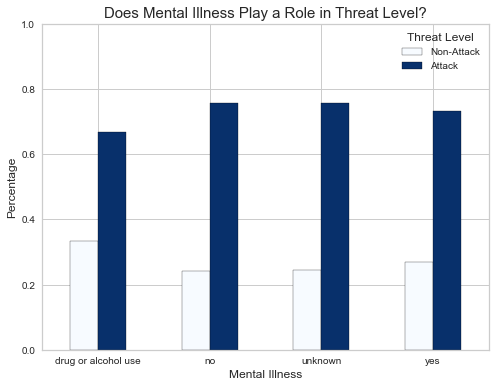

alleged_threat_lvl        0.0       1.0
mental_illness                         
drug or alcohol use  0.333333  0.666667
no                   0.242496  0.757504
unknown              0.244395  0.755605
yes                  0.269129  0.730871

In [15]:
# visualize mental illness vs threat level
ax = pd.crosstab(train.mental_illness, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Mental Illness Play a Role in Threat Level?", fontsize = 15)
plt.ylabel("Percentage", fontsize = 12)
plt.xlabel('Mental Illness', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.mental_illness, train.alleged_threat_lvl, normalize = 'index')
percentages



<div class="alert alert-block alert-success">

### Takeaways
- All instances of the categories have been more likely to have an attack threat level, than a non-attack.
- Highest percentage of non-attacks are people under the influence of drugs/alcohol.
- There is not much variation in the attack threat level and non-attack threat level among the categories. 
    
</div>

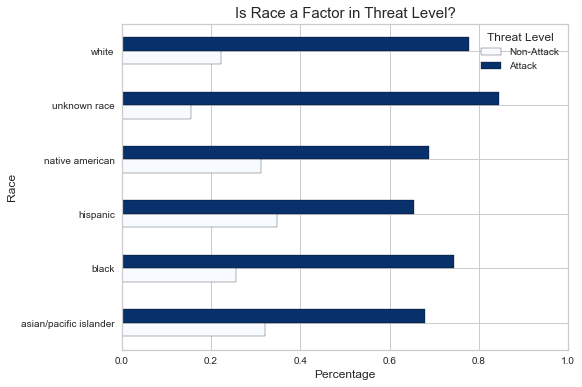

alleged_threat_lvl           0.0       1.0
race                                      
asian/pacific islander  0.320988  0.679012
black                   0.255694  0.744306
hispanic                0.346591  0.653409
native american         0.311475  0.688525
unknown race            0.154971  0.845029
white                   0.221698  0.778302

In [16]:
# visualize race vs alleged threat level
ax = pd.crosstab(train.race, train.alleged_threat_lvl, normalize ='index').plot.barh(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Is Race a Factor in Threat Level?", fontsize = 15)
plt.ylabel("Race", fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.xlim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.race, train.alleged_threat_lvl, normalize = 'index')
percentages



<div class="alert alert-block alert-success">


### Takeaways
- The highest occurrence of non-attacks are seen in Native Americans. Second highest is Hispanics.
- The highest occurrence of attacks are seen in White races. Second highest appears to be Black races. 
- There is a large amount of unknown races considered as having an attack threat level.
    
</div>

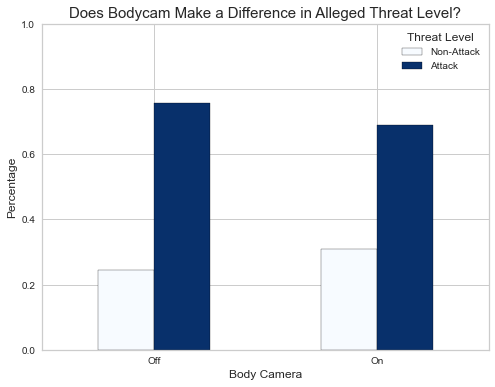

alleged_threat_lvl       0.0       1.0
body_camera                           
0.0                 0.244787  0.755213
1.0                 0.309456  0.690544

In [17]:
# visualize body camera vs alleged threat level
ax = pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Attack', 'Attack'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Does Bodycam Make a Difference in Alleged Threat Level?", fontsize = 15)
plt.ylabel("Percentage", fontsize = 12)
plt.xlabel('Body Camera', fontsize = 12)
ax.tick_params(labelsize=10)
x_labels = ['Off', 'On']
ax.set_xticklabels(x_labels)
plt.xticks(rotation=0)
plt.ylim([0.0, 1.0])
plt.show()

# get percentages df
percentages = pd.crosstab(train.body_camera, train.alleged_threat_lvl, normalize = 'index')
percentages



<div class="alert alert-block alert-success">


### Takeaways
- There seems to be more attacks than non-attacks overall, regardless if body camera is on or off. 
- When bodycam is on, there is a higher chance of a non-attack threat level, than when the body camera is off. 
- In contrast, when the body camera is off, there is a higher chance of an attack threat level, than when the body camera is on. 
    
</div>

 [Jump to Table of Contents](#toc)


## <a name="hypothesis-testing"></a>• Hypothesis Testing

> #### Hypothesis₁
>
> H₀ = There is not a difference between male attackers and the remaining population.
>
> H𝛼 =Attacker status for males & total population are different.

In [18]:
# t-test for gender vs threat level
female = train[train.gender == 'female']
male = train[train.gender == 'male']
transg = train[train.gender == 'transgender']
not_male = train[train.gender != 'male']

male_att = male.alleged_threat_lvl
non_male_att = not_male.alleged_threat_lvl

null_hypothesis = "There is not a difference between male attackers and the remaining population."
alternative_hypothesis = "Attacker status for males & total population are different."
confidence_level = .95
a = 1 - confidence_level

t, p = stats.ttest_ind(male_att, non_male_att)
print(t, p)

if p < a:
    print(f"We reject the null hypothesis: {null_hypothesis}")
    print(f"We can move forward with alternative hypothesis: {alternative_hypothesis}")
else:
    print(f"We fail to reject the null hypothesis: {null_hypothesis}")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

2.668968404957978 0.007640398153261712
We reject the null hypothesis: There is not a difference between male attackers and the remaining population.
We can move forward with alternative hypothesis: Attacker status for males & total population are different.


***

> #### Hypothesis₂
>
> H₀ = Mental status is independent on alleged threat level.
>
> H𝛼 = Mental status is dependent on alleged threat level.

In [19]:
# chi2 test for mental illness vs alleged threat level
exp.chi2_matts(train, 'mental_illness', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  38   76]
 [ 614 1918]
 [ 109  337]
 [ 204  554]]
---
Expected

[[  28.57402597   85.42597403]
 [ 634.64415584 1897.35584416]
 [ 111.78961039  334.21038961]
 [ 189.99220779  568.00779221]]
---

chi^2 = 6.5168
p     = 0.0890

There is insufficient evidence to reject the null hypothesis


***

> #### Hypothesis₃
>
> H₀ = There is independence between the cause of death and civilian threat level.
>
> H𝛼 = There is a dependent relationship between the cause of death and civilian threat level.

In [20]:
# chi2 test for race vs alleged threat level
exp.chi2_matts(train, 'race', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  26   55]
 [ 247  719]
 [ 244  460]
 [  19   42]
 [  53  289]
 [ 376 1320]]
---
Expected

[[  20.3025974    60.6974026 ]
 [ 242.12727273  723.87272727]
 [ 176.45714286  527.54285714]
 [  15.28961039   45.71038961]
 [  85.72207792  256.27792208]
 [ 425.1012987  1270.8987013 ]]
---

chi^2 = 62.2046
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


***

> #### Hypothesis₄
>
> H₀ = There is independence between the use of bodycams and civilian threat level.
>
> H𝛼 = There is a dependent relationship between the the use of bodycams and civilian threat level.

In [21]:
# chi2 test for bodycam vs alleged threat level
exp.chi2_matts(train, 'body_camera', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 857 2644]
 [ 108  241]]
---
Expected

[[ 877.52337662 2623.47662338]
 [  87.47662338  261.52337662]]
---

chi^2 = 6.7261
p     = 0.0095

Because the p-value: 0.0095 is less than alpha: 0.05, we can reject the null hypothesis


***

<div class="alert alert-block alert-success">
    
### Takeaways
All four statistical tests rejected the null hypothesis.
- T-test demonstrates there is a difference between male attackers and the remaining population.
- 1st Chi² test demonstrates that mental status is dependent on alleged threat level.
- 2nd Chi² test demonstrates that race is dependent on alleged threat level.
- 3rd Chi² test demonstrates that bodycam is dependent on alleged threat level.
    
</div>      

 [Jump to Table of Contents](#toc)
___
# <a name="modeling"></a>Modeling

In [22]:
# set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [23]:
# dropping columns that are not numeric datatypes
dropcols = ['date', 
            'gender',
            'race',
            'city',
            'state',
            'zipcode',
            'county',
            'agency_responsible',
            'cause_of_death',
            'description_of_circumstances',
            'official_disposition',
            'criminal_charges_filed',
            'mental_illness',
            'armed_unarmed_status',
            'alleged_threat_lvl',
            'alleged_weapon',
            'fleeing',
            'geography',
            'encounter_type_draft',
            'initial_reported_reason_for_encounter_draft',
            'known_past_shootings_of_officer_draft',
            'age_bins']

X_train = train.drop(columns=dropcols)
X_validate = validate.drop(columns=dropcols)
X_test = test.drop(columns=dropcols)

 [Jump to Table of Contents](#toc)

## <a name="feature-importance"></a>• Feature Importance

#### Select K Best
- Uses statistical tests to determine each feature's usefulness in predicting the target variable. 
- Ranks the features and then select the K best features.

In [24]:
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'body_camera',
 'is_female',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_violent_crime_part_1',
 'is_hispanic',
 'is_unknown race',
 'is_white',
 'rural',
 'suburban',
 'urban',
 'under 12',
 '12-17']

#### Recursive Feature Elimination (RFE)
- Recursively removes attributes to meet the number of required features and then builds a model on those attributes that remain to see if you can you match or improve performance with a smaller subset.

In [25]:
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['is_male',
 'is_transgender',
 'was_yes',
 'was_allegedly_armed',
 'was_vehicle',
 'is_asian/pacific islander',
 'is_hispanic',
 'is_native american',
 'is_unknown race',
 'rural',
 'suburban',
 'urban',
 'cod_lethal',
 'under 12',
 '12-17']

In [26]:
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

21


['was_violent_crime_part_1',
 'is_male',
 'under 12',
 'age',
 'body_camera',
 'is_unknown race',
 'urban',
 'is_white',
 'was_yes',
 'is_transgender',
 'was_vehicle',
 'cod_lethal',
 'is_hispanic',
 'is_asian/pacific islander',
 'suburban',
 '12-17',
 'was_unarmed',
 'was_allegedly_armed',
 'is_native american',
 'rural',
 'is_female']

In [27]:
# specify combined features that reduces multicollinearity
combo_feats = ['55-64',
               'is_native american',
               'mntlill_no',
               'under 12',
               'was_traffic_stop',
               'body_camera',
               'age',
               'was_allegedly_armed',
               'is_black',
               'was_domestic_disturbance',
               'was_fleeing',
               'cod_lethal',
               'was_mental_health_welfare_check',
               'is_white',
               'was_violent_crime_part_1',
               'was_vehicle',
               'mntlill_drug or alcohol use',
               'is_transgender',
               'is_female']
 
print(len(combo_feats))

19


 [Jump to Table of Contents](#toc)

## <a name="identify-baseline"></a>• Identify Baseline

In [28]:
# baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

1.0    2885
0.0     965
Name: alleged_threat_lvl, dtype: int64

In [29]:
# baseline model would be to predict 1 (an attack) since it is most prevalant
# baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 1).mean()

print(f'baseline accuracy: {baseline_accuracy: .4}')

baseline accuracy:  0.7494


 [Jump to Table of Contents](#toc)

## <a name="model-on-train"></a>• Model on Train

### Decision Tree

In [30]:
# create Decision Tree model (specifying max_depth argument and combo_feats)
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

# fit model on combo_feats
dt.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = dt.predict(X_train[combo_feats])

# compute accuracy
dt_train_acc = round(dt.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))

Baseline is 0.7494
----------------
Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): 0.7582


### Random Forest

In [31]:
# create Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

# fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = rf.predict(X_train[combo_feats])

# compute accuracy
rf_train_acc = round(rf.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))

Baseline is 0.7494
----------------
Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): 0.7618


### K-Nearest Neighbor (KNN)

In [32]:
# create KNN model (specifying n_neighbors argument and combo_feats)
knn = KNeighborsClassifier(n_neighbors=20)

# fit model on combo_feats
knn.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = knn.predict(X_train[combo_feats])

# compute accuracy
knn_train_acc = round(knn.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of KNN classifier on combo_feats (n_neighbors = 20): {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))

Baseline is 0.7494
----------------
Accuracy of KNN classifier on combo_feats (n_neighbors = 20): 0.7551


### Logistic Regression

In [33]:
# create Logistic Regression model (default parameters, specifying combo_feats)
logit = LogisticRegression(random_state=123)

# fit model on combo_feats
logit.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = logit.predict(X_train[combo_feats])

# compute accuracy
logit_train_acc = round(logit.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Logistic Regression classifier on combo_feats (default parameters): {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))

Baseline is 0.7494
----------------
Accuracy of Logistic Regression classifier on combo_feats (default parameters): 0.7566


<div class="alert alert-block alert-success">


### Takeways:
- Our baseline accuracy is at 68%.
- All of the models got an accuracy score of 69% on in-sample data, beating the baseline by 1%. 

Next, compare scores to validate (out-of-sample data).
    
</div>

[Jump to Table of Contents](#toc)
## <a name="model-on-validate"></a>• Model on Validate

In [34]:
# dt's metrics on validate

# evaluate on validate sample
y_pred = dt.predict(X_validate[combo_feats])

# compute accuracy
dt_val_acc = round(dt.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Decision Tree classifier on train set: {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on train set: 0.7582
--------------------------------------------------------------
Decision Tree classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.61      0.09      0.16       413
         1.0       0.76      0.98      0.86      1237

    accuracy                           0.76      1650
   macro avg       0.68      0.54      0.51      1650
weighted avg       0.72      0.76      0.68      1650



In [35]:
# rf's metrics on validate

# evaluate on validate sample
y_pred = rf.predict(X_validate[combo_feats])

# compute accuracy
rf_val_acc = round(rf.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Random Forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Random Forest classifier on train set: 0.7618
--------------------------------------------------------------
Random Forest classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.64      0.07      0.13       413
         1.0       0.76      0.99      0.86      1237

    accuracy                           0.76      1650
   macro avg       0.70      0.53      0.49      1650
weighted avg       0.73      0.76      0.68      1650



In [36]:
# knn's metrics on validate

# evaluate on validate sample
y_pred = knn.predict(X_validate[combo_feats])

# compute accuracy
knn_val_acc = round(knn.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of KNN classifier on train set: {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of KNN classifier on train set: 0.7551
--------------------------------------------------------------
KNN classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.41      0.04      0.07       413
         1.0       0.75      0.98      0.85      1237

    accuracy                           0.75      1650
   macro avg       0.58      0.51      0.46      1650
weighted avg       0.67      0.75      0.66      1650



In [37]:
# logit's metrics on validate

# evaluate on validate sample
y_pred = logit.predict(X_validate[combo_feats])

# compute accuracy
logit_val_acc = round(logit.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Logistic Regression classifier on train set: {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on train set: 0.7566
--------------------------------------------------------------
Logistic Regression classifier on validate set:
              precision    recall  f1-score   support

         0.0       0.55      0.12      0.19       413
         1.0       0.77      0.97      0.86      1237

    accuracy                           0.76      1650
   macro avg       0.66      0.54      0.52      1650
weighted avg       0.71      0.76      0.69      1650



In [38]:
# build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

Model  Baseline  Train Accuracy  Validate Accuracy
0        Decision Tree    0.7494          0.7582             0.7576
1        Random Forest    0.7494          0.7618             0.7576
2   K-Nearest Neighbor    0.7494          0.7551             0.7455
3  Logistic Regression    0.7494          0.7566             0.7552

<div class="alert alert-block alert-success">

### Takeaways
- All the models have a slightly decreased accuracy score. 
- The best performing model is Logistic Regression and will be evaluated on test data.

</div>

[Jump to Table of Contents](#toc)

## <a name="model-on-test"></a>• Model on Test

In [39]:
# evaluate on test sample 
y_pred_test = logit.predict(X_test[combo_feats])

# compute accuracy
logit_test_acc = round(logit.score(X_test[combo_feats], y_test), 4)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_test))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.67      0.09      0.16       344
         1.0       0.76      0.98      0.86      1031

    accuracy                           0.76      1375
   macro avg       0.72      0.54      0.51      1375
weighted avg       0.74      0.76      0.69      1375



In [40]:
# append dataframe to record accuracy on final Logistic Regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4),
    'Test Accuracy': round(logit_test_acc, 4)}, ignore_index=True)

In [41]:
metric_df

Model  Baseline  Train Accuracy  Validate Accuracy  \
0        Decision Tree    0.7494          0.7582             0.7576   
1        Random Forest    0.7494          0.7618             0.7576   
2   K-Nearest Neighbor    0.7494          0.7551             0.7455   
3  Logistic Regression    0.7494          0.7566             0.7552   
4  Logistic Regression    0.7494          0.7566             0.7552   

   Test Accuracy  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4         0.7615

<div class="alert alert-block alert-success">

### Takeaways
- All models had roughly the same score for train and validate sets.
- K-nearest neighbor model performed the worst on out-of-sample data.
- The best performing model uses a Logistic Regression algorithm and combined features from Select K Best and Recursive Feature Elimination lists.
- However, even though our final Logistic Regression model beat the baseline by a small percentage, its accuracy score slightly decreased on our test data.



#### As a team we came to a conclusion that the reason our final model performed poorly may be due to missing 1/3 of our data. 

#### For our second iteration, we brought in a larger dataset from the Fatal Encounters website, which includes the same information, but has a larger number of observations available. 
    
</div>

[Jump to Table of Contents](#toc)
___

# <a name="2nd-iteration-acquire-data"></a>2nd Iteration: Acquire Data
During our second iteration, we bring in our alternate [Fatal Encounters](https://fatalencounters.org) Excel Dataset.

In [42]:
# reads data from Fatal Encounters website's downloaded dataset
df2 = pd.read_excel('new_data.xlsx')
df2.head()

Unique ID                   Name Age  Gender                     Race  \
0    25746.0        Samuel H. Knapp  17    Male  European-American/White   
1    25747.0         Mark A. Horton  21    Male   African-American/Black   
2    25748.0  Phillip A. Blurbridge  19    Male   African-American/Black   
3    25749.0             Mark Ortiz  23    Male          Hispanic/Latino   
4        1.0  LaTanya Janelle McCoy  24  Female   African-American/Black   

     Race with imputations Imputation probability  \
0  European-American/White            Not imputed   
1   African-American/Black            Not imputed   
2   African-American/Black            Not imputed   
3          Hispanic/Latino            Not imputed   
4   African-American/Black            Not imputed   

  URL of image (PLS NO HOTLINKS)  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

  Date of injury resulting in death (month/day/year)  \
0                                         2000-01-01   
1                                         2000-01-01   
2                                         2000-01-01   
3                                         2000-01-01   
4                                         2000-01-02   

  Location of injury (address)  ... Unnamed: 36 Unnamed: 37  Unnamed: 38  \
0           27898-27804 US-101  ...         NaN         NaN          NaN   
1              Davison Freeway  ...         NaN         NaN          NaN   
2              Davison Freeway  ...         NaN         NaN          NaN   
3              600 W Cherry Ln  ...         NaN         NaN          NaN   
4         5700 block Mack Road  ...         NaN         NaN          NaN   

  Unnamed: 39 Unnamed: 40 Unnamed: 41  Unnamed: 42 Unnamed: 43 Unnamed: 44  \
0         NaN         NaN         NaN          NaN         NaN         NaN   
1         NaN         NaN         NaN          NaN         NaN         NaN   
2         NaN         NaN         NaN          NaN         NaN         NaN   
3         NaN         NaN         NaN          NaN         NaN         NaN   
4         NaN         NaN         NaN          NaN         NaN         NaN   

   Unnamed: 45  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 46 columns]


### Initial Data Summarization

In [43]:
# rows and columns
df2.shape

(30244, 46)

In [44]:
# list of column names and data types with information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30244 entries, 0 to 30243
Data columns (total 46 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Unique ID                                                        30243 non-null  float64       
 1   Name                                                             30244 non-null  object        
 2   Age                                                              29121 non-null  object        
 3   Gender                                                           30118 non-null  object        
 4   Race                                                             30242 non-null  object        
 5   Race with imputations                                            29718 non-null  object        
 6   Imputation probability                                           29701 non-nul

In [45]:
# check nulls
df2.isnull().sum()

Unique ID                                                              1
Name                                                                   0
Age                                                                 1123
Gender                                                               126
Race                                                                   2
Race with imputations                                                526
Imputation probability                                               543
URL of image (PLS NO HOTLINKS)                                     16251
Date of injury resulting in death (month/day/year)                     0
Location of injury (address)                                         545
Location of death (city)                                              39
State                                                                  1
Location of death (zip code)                                         184
Location of death (county)                         

In [46]:
# specify useless columns and what to exclude for counts
useless_columns = df2.columns[32:]
exclusions = ['Unique ID', 
              'Name',
              'URL of image (PLS NO HOTLINKS)', 
              'Date of injury resulting in death (month/day/year)', 
              'zipcode', 
              'county', 
              'city', 
              'agency_responsible', 
              'description_of_circumstances', 
              'official_disposition',
              'Imputation probability', 
              'Location of injury (address)', 
              'Location of death (zip code)', 
              'Location of death (county)', 
              'Full Address', 
              'Latitude', 
              'Longitude', 
              'Agency or agencies involved', 
              'UID Temporary', 
              'Name Temporary', 
              'Description Temp', 
              'URL Temp', 
              'Brief description', 
              'Supporting document link']

# getting value counts for specific columns
for column in df2.columns:
    if column not in useless_columns and column not in exclusions:
        print(column.upper())
        print(df2[column].value_counts())
        print("-------------------------------------")

AGE
22      912
25      895
24      862
27      848
21      848
       ... 
86        1
88        1
89        1
91        1
0.25      1
Name: Age, Length: 195, dtype: int64
-------------------------------------
GENDER
Male           27200
Female          2898
Transgender       20
Name: Gender, dtype: int64
-------------------------------------
RACE
European-American/White    10148
Race unspecified            8500
African-American/Black      6732
Hispanic/Latino             4030
Asian/Pacific Islander       468
Native American/Alaskan      313
Middle Eastern                50
european-American/White        1
Name: Race, dtype: int64
-------------------------------------
RACE WITH IMPUTATIONS
European-American/White    14258
African-American/Black      8281
Hispanic/Latino             4960
Race unspecified            1292
Asian/Pacific Islander       561
Native American/Alaskan      313
Middle Eastern                50
HIspanic/Latino                2
european-American/White        1
Nam

------------------------------------------------------
------------------------------------------------------


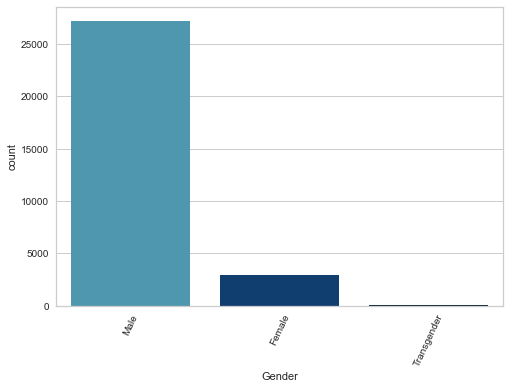

------------------------------------------------------
------------------------------------------------------


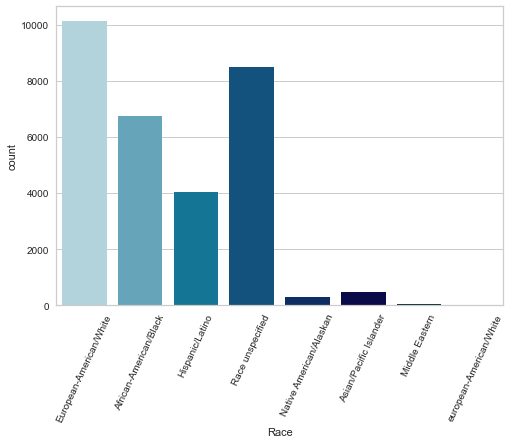

------------------------------------------------------
------------------------------------------------------


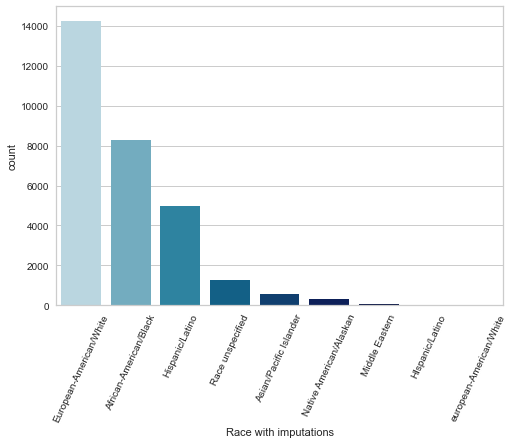

------------------------------------------------------
------------------------------------------------------


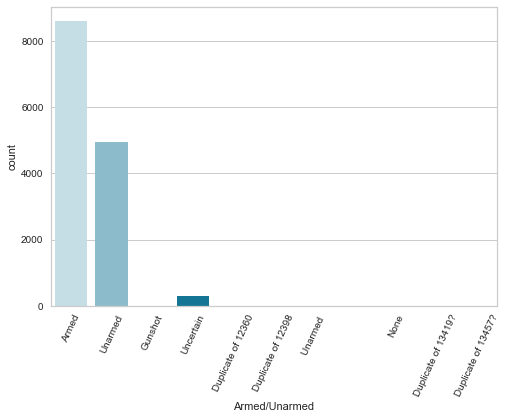

------------------------------------------------------
------------------------------------------------------


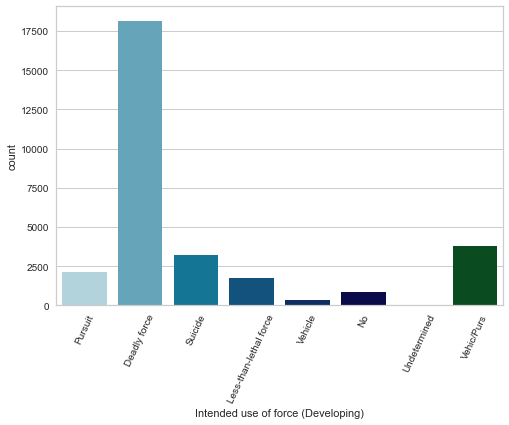

In [47]:
# univariate distributions
more_exclusions = ['Age', 
                   'Location of death (city)', 
                   'State', 
                   'Highest level of force', 
                   'Alleged weapon', 
                   'Aggressive physical movement', 
                   'Fleeing/Not fleeing', 
                   'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS', 
                   'Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS']

for column in df2.columns:
    if column not in exclusions and column not in useless_columns and column not in more_exclusions:
        sns.countplot(x=df2[column], data=df2, palette = 'ocean_r')
        print("------------------------------------------------------")
        print("------------------------------------------------------")
        plt.xticks(rotation=65)
        plt.show()


<div class="alert alert-block alert-success">

### Takeaways
- This FE dataset is much like the first MPL dataset from our first iteration where there are unnecessary columns (begin with Unnamed:), nulls, wide amount of text variation, and more.
- Columns can be renamed, values can be normalized, age bins, dummy variables and encoding can be done. 
- One main difference from this FE dataset is that two features are not going to be used for this second iteration (`Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS` and `Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS`).
    
</div>

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-prepare-and-split-data"></a>2nd Iteration: Prepare and Split Data

In [48]:
# grab cleaned data frame from wrangle.py
df2 = w.wrangle_new_data(cached=False)
df2.head()

unique_id   age  gender      race  \
7446     14050.0  20.0    male     black   
15243    12167.0  12.0  female  hispanic   
15244    12171.0  26.0    male     white   
15245    12172.0  21.0    male     white   
15246    12173.0  31.0    male     black   

      date_of_injury_resulting_in_death_month_day_year  \
7446                                        2007-02-07   
15243                                       2013-01-01   
15244                                       2013-01-01   
15245                                       2013-01-01   
15246                                       2013-01-01   

       location_of_death_zip_code          agency_or_agencies_involved  \
7446                      68111.0              omaha police department   
15243                     78375.0    texas department of public safety   
15244                     56001.0  mankato department of public safety   
15245                     54838.0      douglas county sheriff's office   
15246                     68111.0              omaha police department   

      highest_level_of_force armed_unarmed alleged_weapon  ... had_no_weapon  \
7446                 gunshot         armed   edged weapon  ...             0   
15243      medical emergency       unarmed      no_weapon  ...             1   
15244                tasered       unarmed      no_weapon  ...             1   
15245                gunshot         armed        firearm  ...             0   
15246                gunshot         armed        firearm  ...             0   

      had_other_weapon under 12 12-17  18-24 25-34  35-44  45-54  55-64  65+  
7446                 0      0.0   0.0    1.0   0.0    0.0    0.0    0.0  0.0  
15243                0      0.0   1.0    0.0   0.0    0.0    0.0    0.0  0.0  
15244                0      0.0   0.0    0.0   1.0    0.0    0.0    0.0  0.0  
15245                0      0.0   0.0    1.0   0.0    0.0    0.0    0.0  0.0  
15246                0      0.0   0.0    0.0   1.0    0.0    0.0    0.0  0.0  

[5 rows x 37 columns]

In [49]:
# double check rows and columns
df2.shape

(13137, 37)

In [50]:
# double check no nulls
df2.isnull().sum()

unique_id                                           0
age                                                 0
gender                                              0
race                                                0
date_of_injury_resulting_in_death_month_day_year    0
location_of_death_zip_code                          0
agency_or_agencies_involved                         0
highest_level_of_force                              0
armed_unarmed                                       0
alleged_weapon                                      0
alleged_threat_lvl                                  0
fleeing_not_fleeing                                 0
brief_description                                   0
intended_use_of_force_developing                    0
fleeing                                             0
age_bins                                            0
is_asian_pacific islander                           0
is_black                                            0
is_hispanic                 

In [51]:
# double check data types
df2.dtypes

unique_id                                                  float64
age                                                        float64
gender                                                      object
race                                                        object
date_of_injury_resulting_in_death_month_day_year    datetime64[ns]
location_of_death_zip_code                                 float64
agency_or_agencies_involved                                 object
highest_level_of_force                                      object
armed_unarmed                                               object
alleged_weapon                                              object
alleged_threat_lvl                                          object
fleeing_not_fleeing                                         object
brief_description                                           object
intended_use_of_force_developing                            object
fleeing                                                    flo

In [52]:
# split the data using the split function in explore.py
train, validate, test = split(df2, stratify_by="alleged_threat_lvl")

# check split datasets
print('overall shape of dataframe:', df2.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

# work with training data
train.head()

overall shape of dataframe: (13137, 37)
train: (7356, 37)
validate: (3153, 37)
test: (2628, 37)


unique_id   age gender          race  \
27769    27652.0  48.0   male  unknown_race   
21171    17870.0  35.0   male         black   
26445    26220.0  61.0   male         white   
15302    12221.0  17.0   male         black   
16413    13305.0  29.0   male         white   

      date_of_injury_resulting_in_death_month_day_year  \
27769                                       2020-03-03   
21171                                       2016-07-02   
26445                                       2019-06-24   
15302                                       2013-01-11   
16413                                       2013-08-23   

       location_of_death_zip_code        agency_or_agencies_involved  \
27769                     33187.0       miami-dade police department   
21171                     28806.0        asheville police department   
26445                     34224.0  charlotte county sheriff's office   
15302                      1569.0         uxbridge police department   
16413                     85032.0             mesa police department   

      highest_level_of_force armed_unarmed alleged_weapon  ... had_no_weapon  \
27769                gunshot         armed   edged weapon  ...             0   
21171                gunshot         armed        firearm  ...             0   
26445                gunshot         armed        firearm  ...             0   
15302                vehicle       unarmed      no_weapon  ...             1   
16413                gunshot         armed        firearm  ...             0   

      had_other_weapon under 12 12-17  18-24 25-34  35-44  45-54  55-64  65+  
27769                0      0.0   0.0    0.0   0.0    0.0    1.0    0.0  0.0  
21171                0      0.0   0.0    0.0   0.0    1.0    0.0    0.0  0.0  
26445                0      0.0   0.0    0.0   0.0    0.0    0.0    1.0  0.0  
15302                0      0.0   1.0    0.0   0.0    0.0    0.0    0.0  0.0  
16413                0      0.0   0.0    0.0   1.0    0.0    0.0    0.0  0.0  

[5 rows x 37 columns]

<div class="alert alert-block alert-success">

### Takeaway
- We lost a little more than half of the data, but it is still more observations than our MPV dataset.
- Data is prepped/split and ready to be explored, modeled, and evaluated.
    
</div>

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-explore-data"></a>2nd Iteration: Explore Data

Address questions posed in planning



# <a name="2nd-iteration-visualizations"></a>• 2nd Iteration: Visualizations

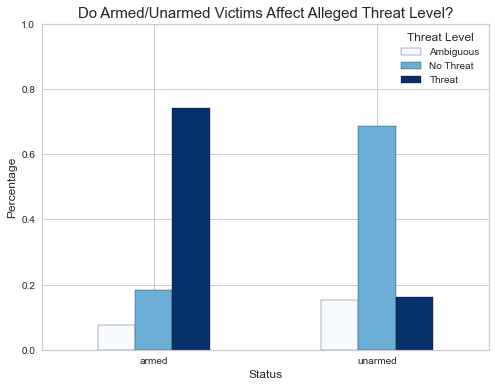

alleged_threat_lvl  ambiguous_threat  no_threat    threat
armed_unarmed                                            
armed                       0.074705   0.184142  0.741153
unarmed                     0.151188   0.685745  0.163067

In [53]:
# visualize armed/unarmed vs alleged threat level
ax = pd.crosstab(train.armed_unarmed, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Ambiguous', 'No Threat', 'Threat'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Do Armed/Unarmed Victims Affect Alleged Threat Level?", fontsize = 15)
plt.xlabel("Status", fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.armed_unarmed, train.alleged_threat_lvl, normalize = 'index')
percentages

<div class="alert alert-block alert-success">

### Takeaways
- As expected, armed victims are at a hight threat level, while unarmed victims are not considered a threat. 
- Still, there are some armed victims considered as not a threat, while some unarmed victims are considered threats. 
- There is a more likely chance that ambiguous threats are unarmed.
    
</div>

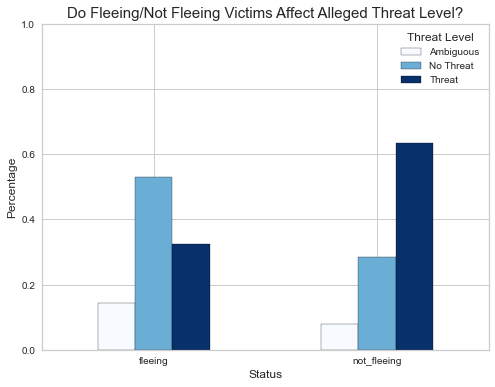

alleged_threat_lvl   ambiguous_threat  no_threat    threat
fleeing_not_fleeing                                       
fleeing                      0.144911   0.529701  0.325388
not_fleeing                  0.080416   0.286017  0.633567

In [54]:
# visualize fleeing_not_fleeing vs alleged threat level
ax = pd.crosstab(train.fleeing_not_fleeing, train.alleged_threat_lvl, normalize ='index').plot.bar(figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black")

# customize legend
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Ambiguous', 'No Threat', 'Threat'], 
          bbox_to_anchor=(1,1), 
          title='Threat Level')

# customize chart
plt.title("Do Fleeing/Not Fleeing Victims Affect Alleged Threat Level?", fontsize = 15)
plt.xlabel("Status", fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
ax.tick_params(labelsize=10)
plt.ylim([0.0, 1.0])
plt.xticks(rotation=0)
plt.show()

# get percentages df
percentages = pd.crosstab(train.fleeing_not_fleeing, train.alleged_threat_lvl, normalize = 'index')
percentages

<div class="alert alert-block alert-success">

### Takeaways
- Fleeing victims have a higher chance of not being a threat.
- Non-fleeing victims have a higher probability of being threats. This could be due to victims fighting back/attacking law enforcement instead of fleeing.  
- Some fleeing victims are considered attacks. Possibly because they are fleeing in vehicles and putting others in danger?
    
</div> 

#### NLP Exploration

In [55]:
# explore word counts for brief_description
nlp = train[['brief_description', 'alleged_threat_lvl']]
nlp

brief_description alleged_threat_lvl
27769  jose gainza allegedly stabbed and killed his d...             threat
21171  police said they were called out to a report o...             threat
26445  around 9 p.m., a call came into 911 that bradl...             threat
15302  rome alexander ives, the driver of a stolen fo...          no_threat
16413  officers attempted to detain jonathan tricaric...             threat
...                                                  ...                ...
16131  merlin factor had allegedly thrown a rock thro...   ambiguous_threat
15416  police attempted to pull over javier silva-mor...          no_threat
21738  a deputy tried to stop a vehicle on hamilton a...          no_threat
17277  shane vanmeter, 27, was allegedly fleeing a po...          no_threat
22328  a euclid police officer fatally shot luke o. s...             threat

[7356 rows x 2 columns]

In [56]:
# define function to clean text from brief description column
ADDITIONAL_STOPWORDS = ['said', '008', 'around', 'two']

def clean_join(text):
    '''
    This function cleans up text data.
    '''
    
    #lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    #normalize
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return ' '.join([wnl.lemmatize(word) for word in words if word not in stopwords])

In [57]:
def clean(text, extra_words = ['said', '008', 'around', 'two']):
    """
    A simple function to cleanup text data:
    takes in a string of text,
    pulls in `nltk`s stopwords and appends any additional `extra_words`
    returns a string filtered for stopwords & lemmatized    
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + extra_words
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [58]:
# apply the clean function
nlp = nlp.brief_description.apply(clean)
nlp

27769    [jose, gainza, allegedly, stabbed, killed, dau...
21171    [police, called, report, shot, fired, pisgah, ...
26445    [9, pm, call, came, 911, bradley, rundle, fire...
15302    [rome, alexander, ives, driver, stolen, ford, ...
16413    [officer, attempted, detain, jonathan, tricari...
                               ...                        
16131    [merlin, factor, allegedly, thrown, rock, some...
15416    [police, attempted, pull, javier, silvamorales...
21738    [deputy, tried, stop, vehicle, hamilton, avenu...
17277    [shane, vanmeter, 27, allegedly, fleeing, poli...
22328    [euclid, police, officer, fatally, shot, luke,...
Name: brief_description, Length: 7356, dtype: object

In [59]:
# check how many words appear for each threat level and percentage
levels = pd.concat([train.alleged_threat_lvl.value_counts(),
                    round(train.alleged_threat_lvl.value_counts(normalize=True), 2)], axis=1)

levels.columns = ['n', 'percent']

levels

n  percent
threat            3846     0.52
no_threat         2748     0.37
ambiguous_threat   762     0.10

In [60]:
# breaking up data into each alleged threat level

# words that appear in threat
threat_words = clean(' '.join(train[train.alleged_threat_lvl == 'threat'].brief_description))

# words that appear in no_threat
no_threat_words = clean(' '.join(train[train.alleged_threat_lvl == 'no_threat'].brief_description))

# words that appear in ambiguous_threat
ambiguous_words = clean(' '.join(train[train.alleged_threat_lvl == 'ambiguous_threat'].brief_description))

# all of the words 
all_words = clean(' '.join(train.brief_description))

In [61]:
# check how often each of the words occurs
threat_freq = pd.Series(threat_words).value_counts()
no_threat_freq = pd.Series(no_threat_words).value_counts()
ambiguous_freq = pd.Series(ambiguous_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

print('Threat Words:')
print(threat_freq)
print('--------------------------')
print('No Threat Words:')
print(no_threat_freq)
print('--------------------------')
print('Ambiguous Threat Words:')
print(ambiguous_freq)
print('--------------------------')
print('All Words:')
print(all_freq)

Threat Words:
officer         5610
police          4466
shot            3711
killed          2628
deputy          1818
                ... 
alison             1
bic                1
whitesbridge       1
writ               1
eppersons          1
Length: 10376, dtype: int64
--------------------------
No Threat Words:
police        3205
officer       1836
killed        1363
vehicle       1325
car           1090
              ... 
karon            1
discovery        1
hhr              1
eyewitness       1
cassandra        1
Length: 9651, dtype: int64
--------------------------
Ambiguous Threat Words:
police         1095
officer         967
shot            713
killed          509
car             387
               ... 
wheelchair        1
residential       1
pacini            1
footmand          1
russell           1
Length: 4163, dtype: int64
--------------------------
All Words:
police        8766
officer       8413
shot          5400
killed        4500
deputy        2927
              ..

In [62]:
# combine frequencies together to get one resulting df
word_counts = (pd.concat([all_freq, 
                          threat_freq, 
                          no_threat_freq, 
                          ambiguous_freq], axis=1, sort=True)
                .set_axis(['All', 
                           'Threat', 
                           'No Threat', 
                           'Ambiguous'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16322 entries, 01 to zyonne
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   All        16322 non-null  int64
 1   Threat     16322 non-null  int64
 2   No Threat  16322 non-null  int64
 3   Ambiguous  16322 non-null  int64
dtypes: int64(4)
memory usage: 637.6+ KB


In [63]:
# What are the most frequently occuring words in the descriptions per level?
word_counts.sort_values(by='All', ascending=False).head(10)

All  Threat  No Threat  Ambiguous
police     8766    4466       3205       1095
officer    8413    5610       1836        967
shot       5400    3711        976        713
killed     4500    2628       1363        509
deputy     2927    1818        763        346
man        2449    1700        484        265
vehicle    2384     755       1325        304
car        2198     721       1090        387
allegedly  2101    1156        713        232
gun        1820    1362        231        227

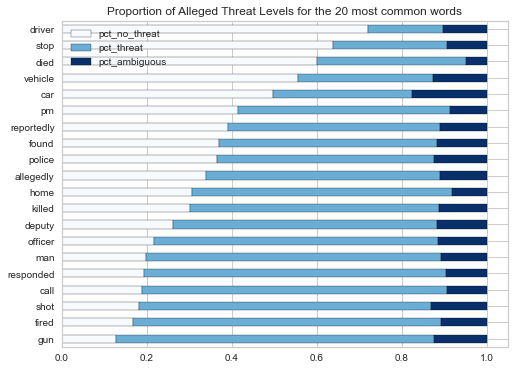

In [64]:
# visualize percentage for each alleged threat level
(word_counts
 .assign(pct_no_threat=word_counts['No Threat'] / word_counts['All'],
         pct_threat=word_counts['Threat'] / word_counts['All'], 
         pct_ambiguous=word_counts['Ambiguous'] / word_counts['All'])
 .sort_values(by='All')
 [['pct_no_threat', 'pct_threat', 'pct_ambiguous']]
 .tail(20)
 .sort_values('pct_no_threat')
 .plot.barh(stacked=True, figsize=(8, 6), cmap=plt.cm.get_cmap('Blues'), ec="black"))

plt.title('Proportion of Alleged Threat Levels for the 20 most common words')
plt.show()

<div class="alert alert-block alert-success">

### Takeaways
- Top words for no threat levels are 'driver', 'stop', 'died', 'vehicle', 'car'. Possibly people fleeing?
- Top words for levels considered as threats are 'gun', 'fired', 'shot', 'man', 'officer', 'killed'. Possibly people that were harming, or close to harming, others. 
- Ambiguous threat levels have the least amount of words. 
    
</div>

In [65]:
# variables for most common Bigrams for each alleged threat level
threat_bigrams = (pd.Series(nltk.ngrams(threat_words, 2))
                      .value_counts()
                      .head(20))
no_threat_bigrams = (pd.Series(nltk.ngrams(no_threat_words, 2))
                      .value_counts()
                      .head(20))
ambiguous_bigrams = (pd.Series(nltk.ngrams(ambiguous_words, 2))
                      .value_counts()
                      .head(20))
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

In [66]:
# variables for most common Trigrams for each alleged threat level
threat_trigrams = (pd.Series(nltk.ngrams(threat_words, 3))
                      .value_counts()
                      .head(20))
no_threat_trigrams = (pd.Series(nltk.ngrams(no_threat_words, 3))
                      .value_counts()
                      .head(20))
ambiguous_trigrams = (pd.Series(nltk.ngrams(ambiguous_words, 3))
                      .value_counts()
                      .head(20))
all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))

### Frequency Bigrams / Trigrams

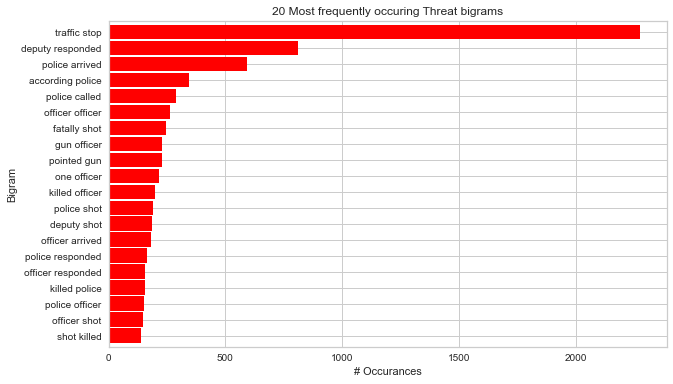

In [67]:
# bigrams
threat_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Threat bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = threat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

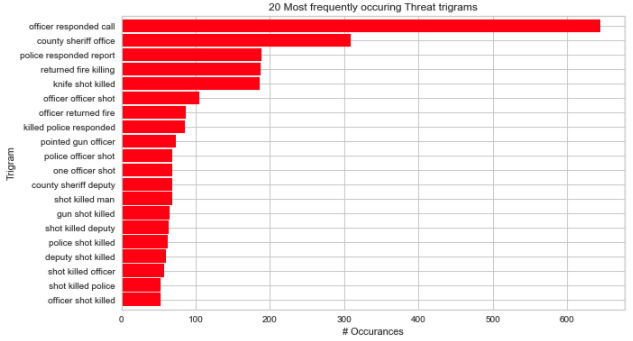

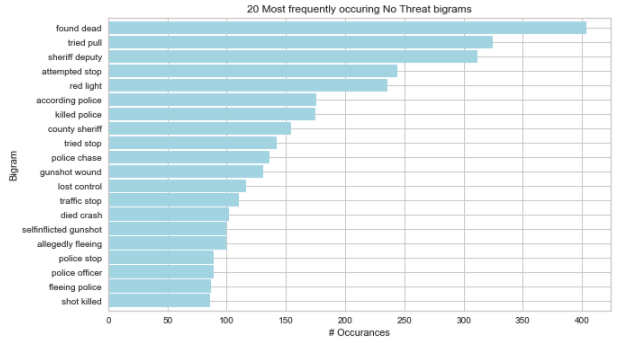 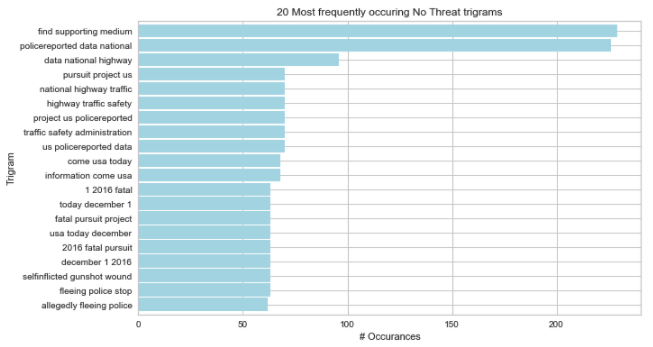

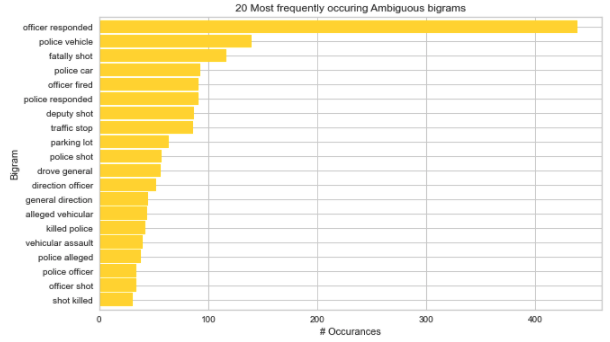 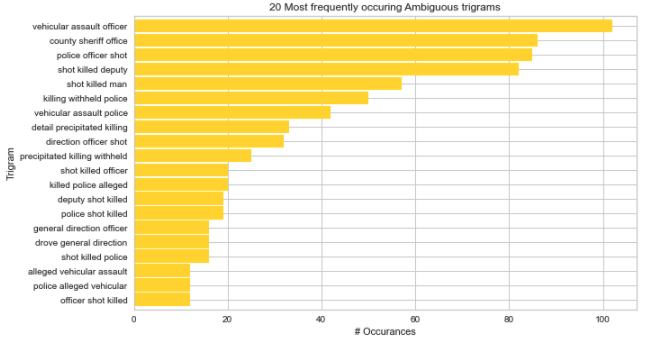

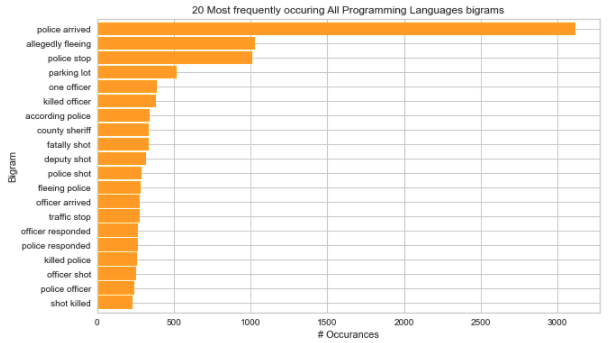 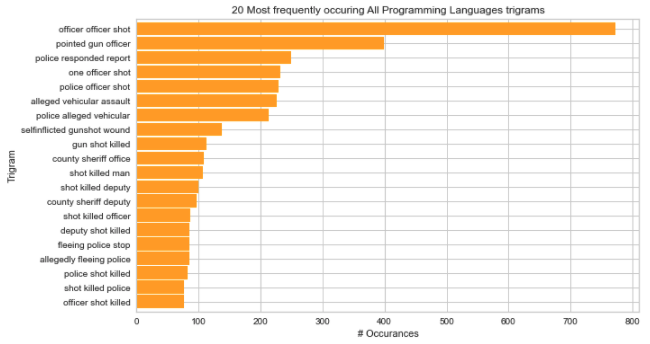

## Bigram WordClouds

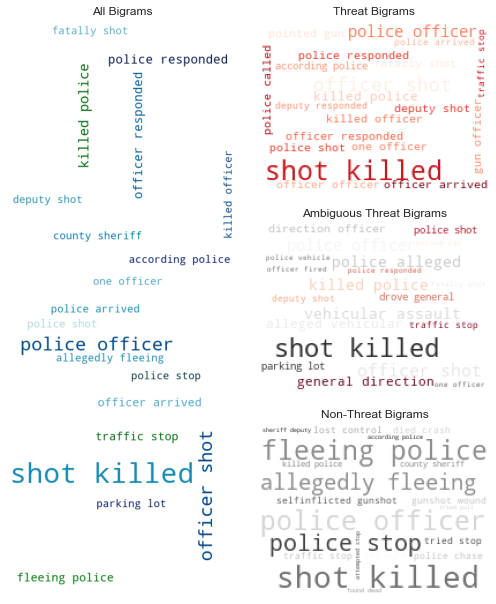

In [69]:
all2 = {k[0] + ' ' + k[1]: v for k, v in all_bigrams.to_dict().items()}
all2_cloud = WordCloud(background_color='white', width=400, height=1000, colormap="ocean_r").generate_from_frequencies(all2)

threat2 = {k[0] + ' ' + k[1]: v for k, v in threat_bigrams.to_dict().items()}
threat2_cloud = WordCloud(background_color='white', width=200, height=150, max_words=200, colormap="Reds").generate_from_frequencies(threat2)

nonthreat2 = {k[0] + ' ' + k[1]: v for k, v in no_threat_bigrams.to_dict().items()}
nonthreat2_cloud = WordCloud(background_color='white', width=200, height=150, colormap="Greys").generate_from_frequencies(nonthreat2)

ambig2 = {k[0] + ' ' + k[1]: v for k, v in ambiguous_bigrams.to_dict().items()}
ambig2_cloud = WordCloud(background_color='white', width=200, height=150, colormap="RdGy").generate_from_frequencies(ambig2)


plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.35, .7, .5, .3]), plt.axes([.35, 0.35, .5, .3]), plt.axes([.35, 0, .5, .3])]

axs[0].imshow(all2_cloud)
axs[1].imshow(threat2_cloud)
axs[2].imshow(ambig2_cloud)
axs[3].imshow(nonthreat2_cloud)


axs[0].set_title('All Bigrams')
axs[1].set_title('Threat Bigrams')
axs[2].set_title('Ambiguous Threat Bigrams')
axs[3].set_title('Non-Threat Bigrams')


for ax in axs: ax.axis('off')

## Trigram WordClouds

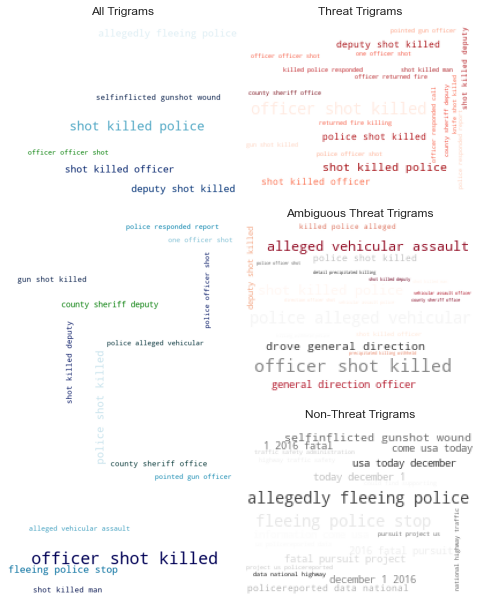

In [70]:
all3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in all_trigrams.to_dict().items()}
all3_cloud = WordCloud(background_color='white', width=400, height=1000, colormap="ocean_r").generate_from_frequencies(all3)

threat3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in threat_trigrams.to_dict().items()}
threat3_cloud = WordCloud(background_color='white', width=200, height=150, colormap="Reds").generate_from_frequencies(threat3)

nonthreat3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in no_threat_trigrams.to_dict().items()}
nonthreat3_cloud = WordCloud(background_color='white', width=200, height=150, colormap="Greys").generate_from_frequencies(nonthreat3)

ambig3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ambiguous_trigrams.to_dict().items()}
ambig3_cloud = WordCloud(background_color='white', width=200, height=150, colormap="RdGy").generate_from_frequencies(ambig3)



plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.33, .7, .5, .3]), plt.axes([.33, 0.35, .5, .3]), plt.axes([.33, 0, .5, .3])]

axs[0].imshow(all3_cloud)
axs[1].imshow(threat3_cloud)
axs[2].imshow(ambig3_cloud)
axs[3].imshow(nonthreat3_cloud)


axs[0].set_title('All Trigrams')
axs[1].set_title('Threat Trigrams')
axs[2].set_title('Ambiguous Threat Trigrams')
axs[3].set_title('Non-Threat Trigrams')


for ax in axs: ax.axis('off')

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-hypothesis-testing"></a>• 2nd Iteration: Hypothesis Testing

> #### Hypothesis₀₁
>
> H₀ = There is independence between the threat level of armed and unarmed victims.
>
> H𝛼 = There is a dependent relationship between the threat level of armed and unarmed victims.

In [71]:
# chi2 test for armed/unarmed victims vs alleged threat level
exp.chi2_matts(train, 'armed_unarmed', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 342  843 3393]
 [ 420 1905  453]]
---
Expected

[[ 474.23001631 1710.21533442 2393.55464927]
 [ 287.76998369 1037.78466558 1452.44535073]]
---

chi^2 = 2367.1131
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


In [72]:
# chi2 test for fleeing_not_fleeing victims vs alleged threat level
exp.chi2_matts(train, 'fleeing_not_fleeing', 'alleged_threat_lvl', alpha=0.05)

Observed

[[ 383 1400  860]
 [ 379 1348 2986]]
---
Expected

[[ 273.78548124  987.35236542 1381.86215334]
 [ 488.21451876 1760.64763458 2464.13784666]]
---

chi^2 = 644.7738
p     = 0.0000

Because the p-value: 0.0 is less than alpha: 0.05, we can reject the null hypothesis


<div class="alert alert-block alert-success">

### Takeaways
- Both statistical tests rejected the null hypothesis.
    - 1st Chi² test demonstrates that armed/unarmed victims are dependent on alleged threat level.
    - 2nd Chi² test demonstrates that fleeing/not fleeing victims are dependent on alleged threat level.
    
</div>

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-modeling"></a>2nd Iteration: Modeling

In [73]:
# encode target variable 
train.alleged_threat_lvl = LabelEncoder().fit_transform(train.alleged_threat_lvl)
validate.alleged_threat_lvl = LabelEncoder().fit_transform(validate.alleged_threat_lvl)
test.alleged_threat_lvl = LabelEncoder().fit_transform(test.alleged_threat_lvl)


In [74]:
# set up X inputs and y target variable for each split
X_train = train.drop(columns=['alleged_threat_lvl'])
y_train = train.alleged_threat_lvl

X_validate = validate.drop(columns=['alleged_threat_lvl'])
y_validate = validate.alleged_threat_lvl

X_test = test.drop(columns=['alleged_threat_lvl'])
y_test = test.alleged_threat_lvl

In [75]:
# dropping columns that are not numeric datatypes
dropcols = ['unique_id', 'gender', 'race',\
       'date_of_injury_resulting_in_death_month_day_year',\
       'location_of_death_zip_code', 'agency_or_agencies_involved',\
       'highest_level_of_force', 'armed_unarmed', 'alleged_weapon',\
       'alleged_threat_lvl', 'fleeing_not_fleeing', 'brief_description',\
       'intended_use_of_force_developing', 'age_bins']

X_train = train.drop(columns=dropcols)
X_validate = validate.drop(columns=dropcols)
X_test = test.drop(columns=dropcols)

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-feature-importance"></a>• 2nd Iteration: Feature Importance

In [76]:
# select k best
f_features = select_kbest(X_train, y_train, 15)
f_features

['age',
 'fleeing',
 'is_hispanic',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '12-17',
 '18-24',
 '35-44',
 '45-54']

In [77]:
# recursive feature elimination (rfe)
rfe_features = rfe(X_train, y_train, 15)
rfe_features

['fleeing',
 'is_middle eastern',
 'is_native_american',
 'is_unknown_race',
 'is_unarmed',
 'had_blunt object',
 'had_edged weapon',
 'had_firearm',
 'had_no_weapon',
 'had_other_weapon',
 'under 12',
 '18-24',
 '25-34',
 '35-44',
 '45-54']

In [78]:
# combine features
combo_feats = list(set(f_features + rfe_features))
print(len(combo_feats))
combo_feats

18


['is_middle eastern',
 'fleeing',
 'had_edged weapon',
 'is_hispanic',
 'is_native_american',
 'had_blunt object',
 '35-44',
 '45-54',
 '25-34',
 '12-17',
 '18-24',
 'under 12',
 'age',
 'had_firearm',
 'had_other_weapon',
 'is_unarmed',
 'is_unknown_race',
 'had_no_weapon']

In [79]:
# specify combined features that reduces multicollinearity
combo_feats = ['fleeing',
               'had_other_weapon',
               'is_middle eastern',
               '12-17',
               'had_no_weapon',
               'is_native_american',
               '25-34',
               '18-24',
               'under 12',
               'had_firearm',
               'is_hispanic']
 
print(len(combo_feats))

11


[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-identify-baseline"></a>• 2nd Iteration: Identify Baseline

### Key:
- 2 = threat

- 1 = no threat

- 0 = ambiguous threat

In [80]:
# baseline prediction: the most prevalent class in training dataset(the mode)
train.alleged_threat_lvl.value_counts()

2    3846
1    2748
0     762
Name: alleged_threat_lvl, dtype: int64

In [81]:
# baseline model would be to predict threat (2) since it is most prevalant
# baseline accuracy:
baseline_accuracy = (train.alleged_threat_lvl == 2).mean()

print(f'baseline accuracy: {baseline_accuracy: .4}')

baseline accuracy:  0.5228


[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-train"></a>• 2nd Iteration: Model on Train

### Decision Tree

In [82]:
# create Decision Tree model (specifying max_depth argument and combo_feats)
dt = DecisionTreeClassifier(max_depth=3, random_state=123)

# fit model on combo_feats
dt.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = dt.predict(X_train[combo_feats])

# compute accuracy
dt_train_acc = round(dt.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Decision Tree classifier on combo_feats (max_depth = 3): 0.7187


### Random Forest

In [83]:
# create Random Forest model (specifying max_depth/min_samples_leaf arguments and combo_feats)
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

# fit model on combo_feats
rf.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = rf.predict(X_train[combo_feats])

# compute accuracy
rf_train_acc = round(rf.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Random Forest classifier on combo_feats (max_depth = 5, min_samples_leaf = 3): 0.7191


### K-Nearest Neighbor (KNN)

In [84]:
# create KNN model (specifying n_neighbors argument and combo_feats)
knn = KNeighborsClassifier(n_neighbors=20)

# fit model on combo_feats
knn.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = knn.predict(X_train[combo_feats])

# compute accuracy
knn_train_acc = round(knn.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of KNN classifier on combo_feats (n_neighbors = 20): {:4f}'
     .format(knn.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of KNN classifier on combo_feats (n_neighbors = 20): 0.712887


### Logistic Regression

In [85]:
# create Logistic Regression model (default parameters, specifying combo_feats)
logit = LogisticRegression(random_state=123)

# fit model on combo_feats
logit.fit(X_train[combo_feats], y_train)

# get predictions from model
y_pred = logit.predict(X_train[combo_feats])

# compute accuracy
logit_train_acc = round(logit.score(X_train[combo_feats], y_train), 4)

# compare to baseline
print("Baseline is", round(baseline_accuracy, 4))
print("----------------")
print('Accuracy of Logistic Regression classifier on combo_feats (default parameters): {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))

Baseline is 0.5228
----------------
Accuracy of Logistic Regression classifier on combo_feats (default parameters): 0.7178


<div class="alert alert-block alert-success">

### Takeaways:
- **Decision Tree** model (dt) specifying max_depth argument of 3 and using combo_feats:
    - Score of 71.87% accuracy
    
    
    
- **Random Forest** model (rf) specifying max_depth argument of 5, min_samples_leaf argument of 3 and using combo_feats:
    - Score of 71.91% accuracy
    
    
    
- **K-Nearest Neighbor** model (knn) specifying n_neighbors argument of 20 and using combo_feats:
    - Score of 71.29% accuracy
    
    
    
- **Logistic Regression** model (logit) using default parameters and combo_feats:
    - Score of 71.78% accuracy

Next, compare scores to validate (out-of-sample data).
    
</div>

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-validate"></a>• 2nd Iteration: Model on Validate

In [86]:
# dt's metrics on validate

# evaluate on validate sample
y_pred = dt.predict(X_validate[combo_feats])

# compute accuracy
dt_val_acc = round(dt.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Decision Tree classifier on train set: {:.4f}'
     .format(dt.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Decision Tree classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Decision Tree classifier on train set: 0.7187
--------------------------------------------------------------
Decision Tree classifier on validate set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.68      0.70      0.69      1177
           2       0.74      0.88      0.80      1649

    accuracy                           0.72      3153
   macro avg       0.47      0.52      0.50      3153
weighted avg       0.64      0.72      0.68      3153



In [87]:
# rf's metrics on validate

# evaluate on validate sample
y_pred = rf.predict(X_validate[combo_feats])

# compute accuracy
rf_val_acc = round(rf.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Random Forest classifier on train set: {:.4f}'
     .format(rf.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Random Forest classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Random Forest classifier on train set: 0.7191
--------------------------------------------------------------
Random Forest classifier on validate set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.68      0.70      0.69      1177
           2       0.74      0.88      0.80      1649

    accuracy                           0.72      3153
   macro avg       0.47      0.52      0.50      3153
weighted avg       0.64      0.72      0.68      3153



In [88]:
# knn's metrics on validate

# evaluate on validate sample
y_pred = knn.predict(X_validate[combo_feats])

# compute accuracy
knn_val_acc = round(knn.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of KNN classifier on train set: {:.4f}'
     .format(knn.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("KNN classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of KNN classifier on train set: 0.7129
--------------------------------------------------------------
KNN classifier on validate set:
              precision    recall  f1-score   support

           0       0.44      0.01      0.02       327
           1       0.69      0.63      0.66      1177
           2       0.71      0.89      0.79      1649

    accuracy                           0.70      3153
   macro avg       0.62      0.51      0.49      3153
weighted avg       0.68      0.70      0.66      3153



In [89]:
# logit's metrics on validate

# evaluate on validate sample
y_pred = logit.predict(X_validate[combo_feats])

# compute accuracy
logit_val_acc = round(logit.score(X_validate[combo_feats], y_validate), 4)

# compare train to validate
print('Accuracy of Logistic Regression classifier on train set: {:.4f}'
     .format(logit.score(X_train[combo_feats], y_train)))
print("--------------------------------------------------------------")
print("Logistic Regression classifier on validate set:")
print(classification_report(y_validate, y_pred))

Accuracy of Logistic Regression classifier on train set: 0.7178
--------------------------------------------------------------
Logistic Regression classifier on validate set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.68      0.70      0.69      1177
           2       0.74      0.87      0.80      1649

    accuracy                           0.72      3153
   macro avg       0.47      0.52      0.50      3153
weighted avg       0.64      0.72      0.68      3153



In [90]:
# build dataframe to record accuracy (starting with decision tree)
metric_df = pd.DataFrame(data=[{
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy': round(dt_val_acc, 4)}])

# append dataframe to record accuracy on random forest
metric_df = metric_df.append({
    'Model': 'Random Forest', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(rf_train_acc, 4),
    'Validate Accuracy':round(rf_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on knn
metric_df = metric_df.append({
    'Model': 'K-Nearest Neighbor', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(knn_train_acc, 4),
    'Validate Accuracy':round(knn_val_acc, 4)}, ignore_index=True)

# append dataframe to record accuracy on logistic regression
metric_df = metric_df.append({
    'Model': 'Logistic Regression', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(logit_train_acc, 4),
    'Validate Accuracy':round(logit_val_acc, 4)}, ignore_index=True)


metric_df

Model  Baseline  Train Accuracy  Validate Accuracy
0        Decision Tree    0.5228          0.7187             0.7187
1        Random Forest    0.5228          0.7191             0.7184
2   K-Nearest Neighbor    0.5228          0.7129             0.7044
3  Logistic Regression    0.5228          0.7178             0.7165

<div class="alert alert-block alert-success">

### Takeaways

**Decision Tree** is the best-performing model and will be evaluated on test data.

</div>

[Jump to Table of Contents](#toc)
___
# <a name="2nd-iteration-test"></a>• 2nd Iteration: Model on Test

In [91]:
# evaluate on test sample 
y_pred_test = dt.predict(X_test[combo_feats])

# compute accuracy
dt_test_acc = round(dt.score(X_test[combo_feats], y_test), 4)

print("Random Forest Model:")
print(classification_report(y_test, y_pred_test))

Random Forest Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       273
           1       0.68      0.69      0.68       981
           2       0.74      0.87      0.80      1374

    accuracy                           0.72      2628
   macro avg       0.47      0.52      0.50      2628
weighted avg       0.64      0.72      0.67      2628



In [92]:
# append dataframe to record accuracy on final decision tree model
metric_df = metric_df.append({
    'Model': 'Decision Tree', 
    'Baseline': round(baseline_accuracy, 4),
    'Train Accuracy': round(dt_train_acc, 4),
    'Validate Accuracy':round(dt_val_acc, 4),
    'Test Accuracy': round(dt_test_acc, 4)}, ignore_index=True)

metric_df

Model  Baseline  Train Accuracy  Validate Accuracy  \
0        Decision Tree    0.5228          0.7187             0.7187   
1        Random Forest    0.5228          0.7191             0.7184   
2   K-Nearest Neighbor    0.5228          0.7129             0.7044   
3  Logistic Regression    0.5228          0.7178             0.7165   
4        Decision Tree    0.5228          0.7187             0.7187   

   Test Accuracy  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4         0.7154

In [93]:
#visualize decision tree 
dot_data = export_graphviz(dt, 
                           feature_names= X_train[combo_feats].columns, 
                           rounded=True, 
                           filled=True, 
                           out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('threat_level_decision_tree', view=True)

'threat_level_decision_tree.pdf'

## Decision Tree Visualization

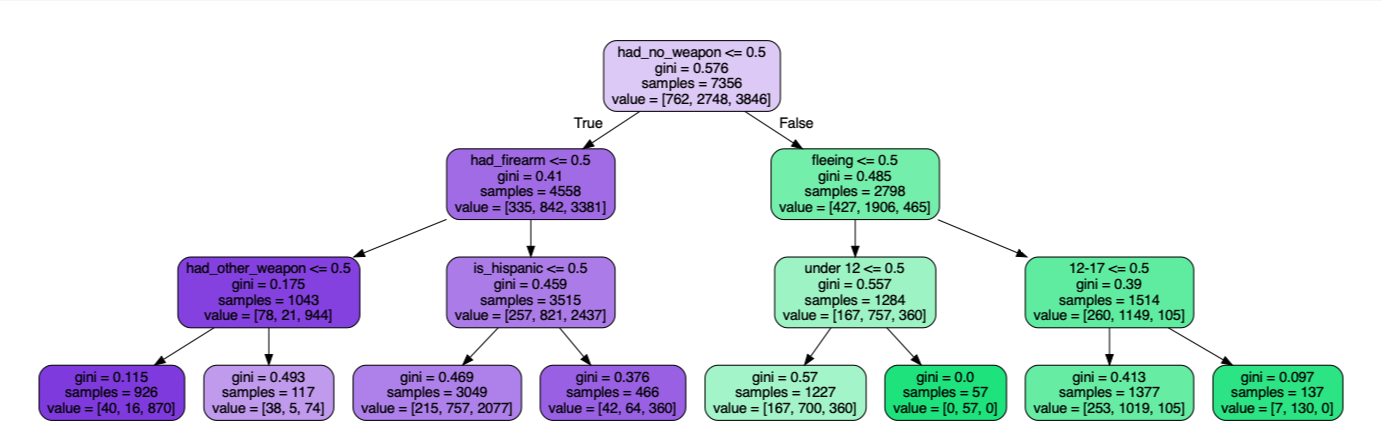
___

### What is ROC?

ROC curves describe the **trade-off between the true positive rate (TPR) and false positive (FPR) rate along different probability thresholds** for a classifier. True positive rate is also known as recall and sometimes Sensitivity — it’s a measure of how well you can find the needle in a haystack.

**The receiver operating characteristic (ROC) curve has become the p-value of machine learning classification** — it’s very frequently used, misused, misinterpreted, and mis-maligned.

However, ROC curves (like p-values) are useful when used right. By that, I mean they are **useful when not used as a rote score**, but when they form part of a nuanced description of a model’s ability to help solve the problem at hand (e.g. in the case of minority class identification, do they perform better than a random guess or assuming all instances are in the majority class).

### What is AUC?

Area Under the Curve gives the rate of successful classification by the model. The AUC makes it easy to compare the ROC curve of one model to another.




In [94]:
dt.feature_importances_

array([0.0438291 , 0.01523259, 0.        , 0.00703148, 0.85229204,
       0.        , 0.        , 0.        , 0.01325378, 0.06120492,
       0.0071561 ])

In [95]:
dt_fe_df = pd.DataFrame(dt.feature_importances_, index = X_train[combo_feats].columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = False)

dt_fe_df['coeffs']= round(dt_fe_df.coeffs*100, 2)

dt_fe_df

coeffs
had_no_weapon        85.23
had_firearm           6.12
fleeing               4.38
had_other_weapon      1.52
under 12              1.33
is_hispanic           0.72
12-17                 0.70
is_middle eastern     0.00
is_native_american    0.00
25-34                 0.00
18-24                 0.00

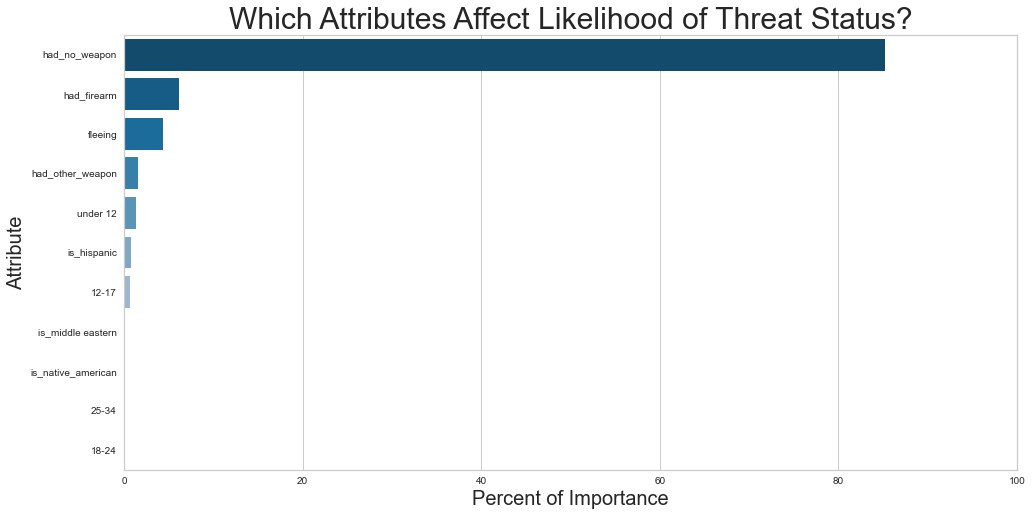

In [96]:
plt.figure(figsize=(16, 8))
sns.barplot(data=dt_fe_df, x='coeffs', y=dt_fe_df.index, palette='PuBu_r')
plt.title('Which Attributes Affect Likelihood of Threat Status?', fontsize=30)
plt.xlim([0, 100])
plt.xlabel('Percent of Importance', fontsize=20)
plt.ylabel('Attribute', fontsize=20)
plt.show()

In [97]:
iter2_dt_acc = pd.DataFrame({

    'titles':['Actual Threat', 'Baseline Threat Accuracy', 'Decision Tree Model Threat Accuracy'],
    'pct':[round(((df2.alleged_threat_lvl == 'threat').mean())*100, 2), round(((train.alleged_threat_lvl == 2).mean())*100, 2), round((dt.score(X_test[combo_feats], y_test))*100, 2)]
})

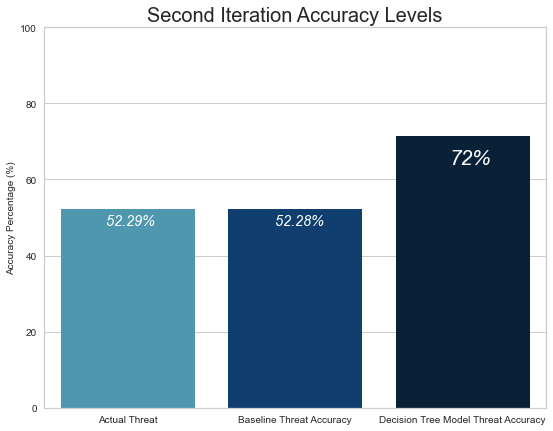

In [98]:
f, ax = plt.subplots(figsize=(9, 7)) 

sns.barplot(data=iter2_dt_acc, x='titles', y='pct', palette='ocean_r')

ax.text(1.92, 64, '72%', style='italic', size='xx-large', color='white')
ax.text(0.88, 48, '52.28%', style='italic', size='large', color='white')
ax.text(-0.13, 48, '52.29%', style='italic', size='large', color='white')

plt.title('Second Iteration Accuracy Levels', fontsize=20)
plt.ylim([0, 100])
plt.xlabel('', fontsize=10)
plt.ylabel('Accuracy Percentage (%)', fontsize=10)
plt.show()

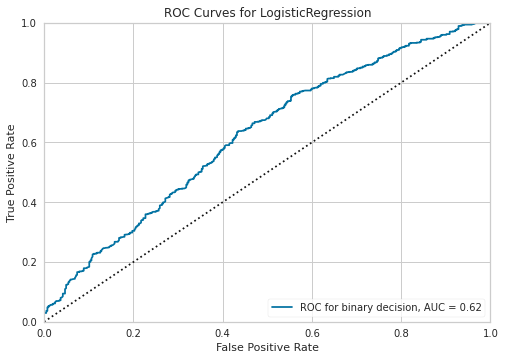

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
from yellowbrick.classifier import ROCAUC

# First Iteration Area Under the Curve
visualizer = ROCAUC(LogisticRegression(), classes=["threat", "no_threat"],
micro=False, macro=False, per_class=False 
)

visualizer.fit(X_train[combo_feats], y_train)        # Fit the training data to the visualizer
visualizer.score(X_test[combo_feats], y_test)        # Evaluate the model on the test data
visualizer.show() 

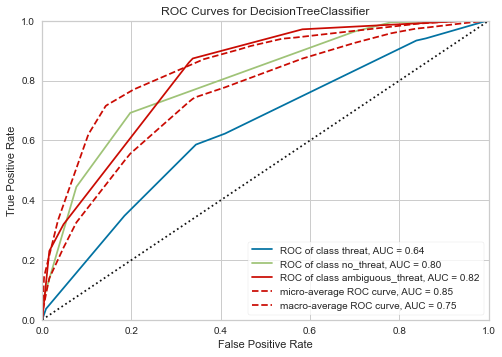

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [100]:
# Second Iteration AUCROC Visualization
visualizer = ROCAUC(dt, classes=["threat", "no_threat", "ambiguous_threat"])

visualizer.fit(X_train[combo_feats], y_train)        # Fit the training data to the visualizer
visualizer.score(X_test[combo_feats], y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

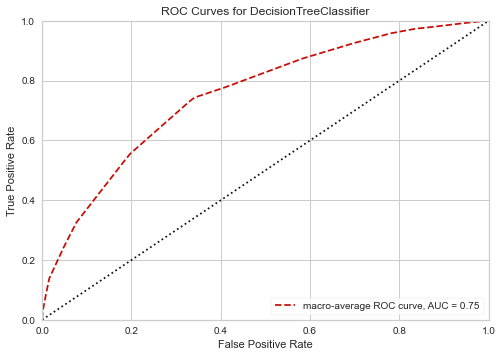

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [101]:
# Macro-Average AUCROC
visualizer = ROCAUC(dt, per_class=False, micro=False
)

visualizer.fit(X_train[combo_feats], y_train)        # Fit the training data to the visualizer
visualizer.score(X_test[combo_feats], y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

[Jump to Table of Contents](#toc)
___
# <a name="drivers"></a>Drivers

- The top drivers of predicting a victim's threat level were encounter type of incident, gender, race, armed/unarmed status, mental illness, age, geography, fleeing events, and body camera reports.
- These drivers can be used to shed light on changes to be made in law enforcement and to help law enforcement agencies spot risk factors, so they may step in before risk transforms into actual harm.

[Jump to Table of Contents](#toc)
___
# <a name="conclusion">

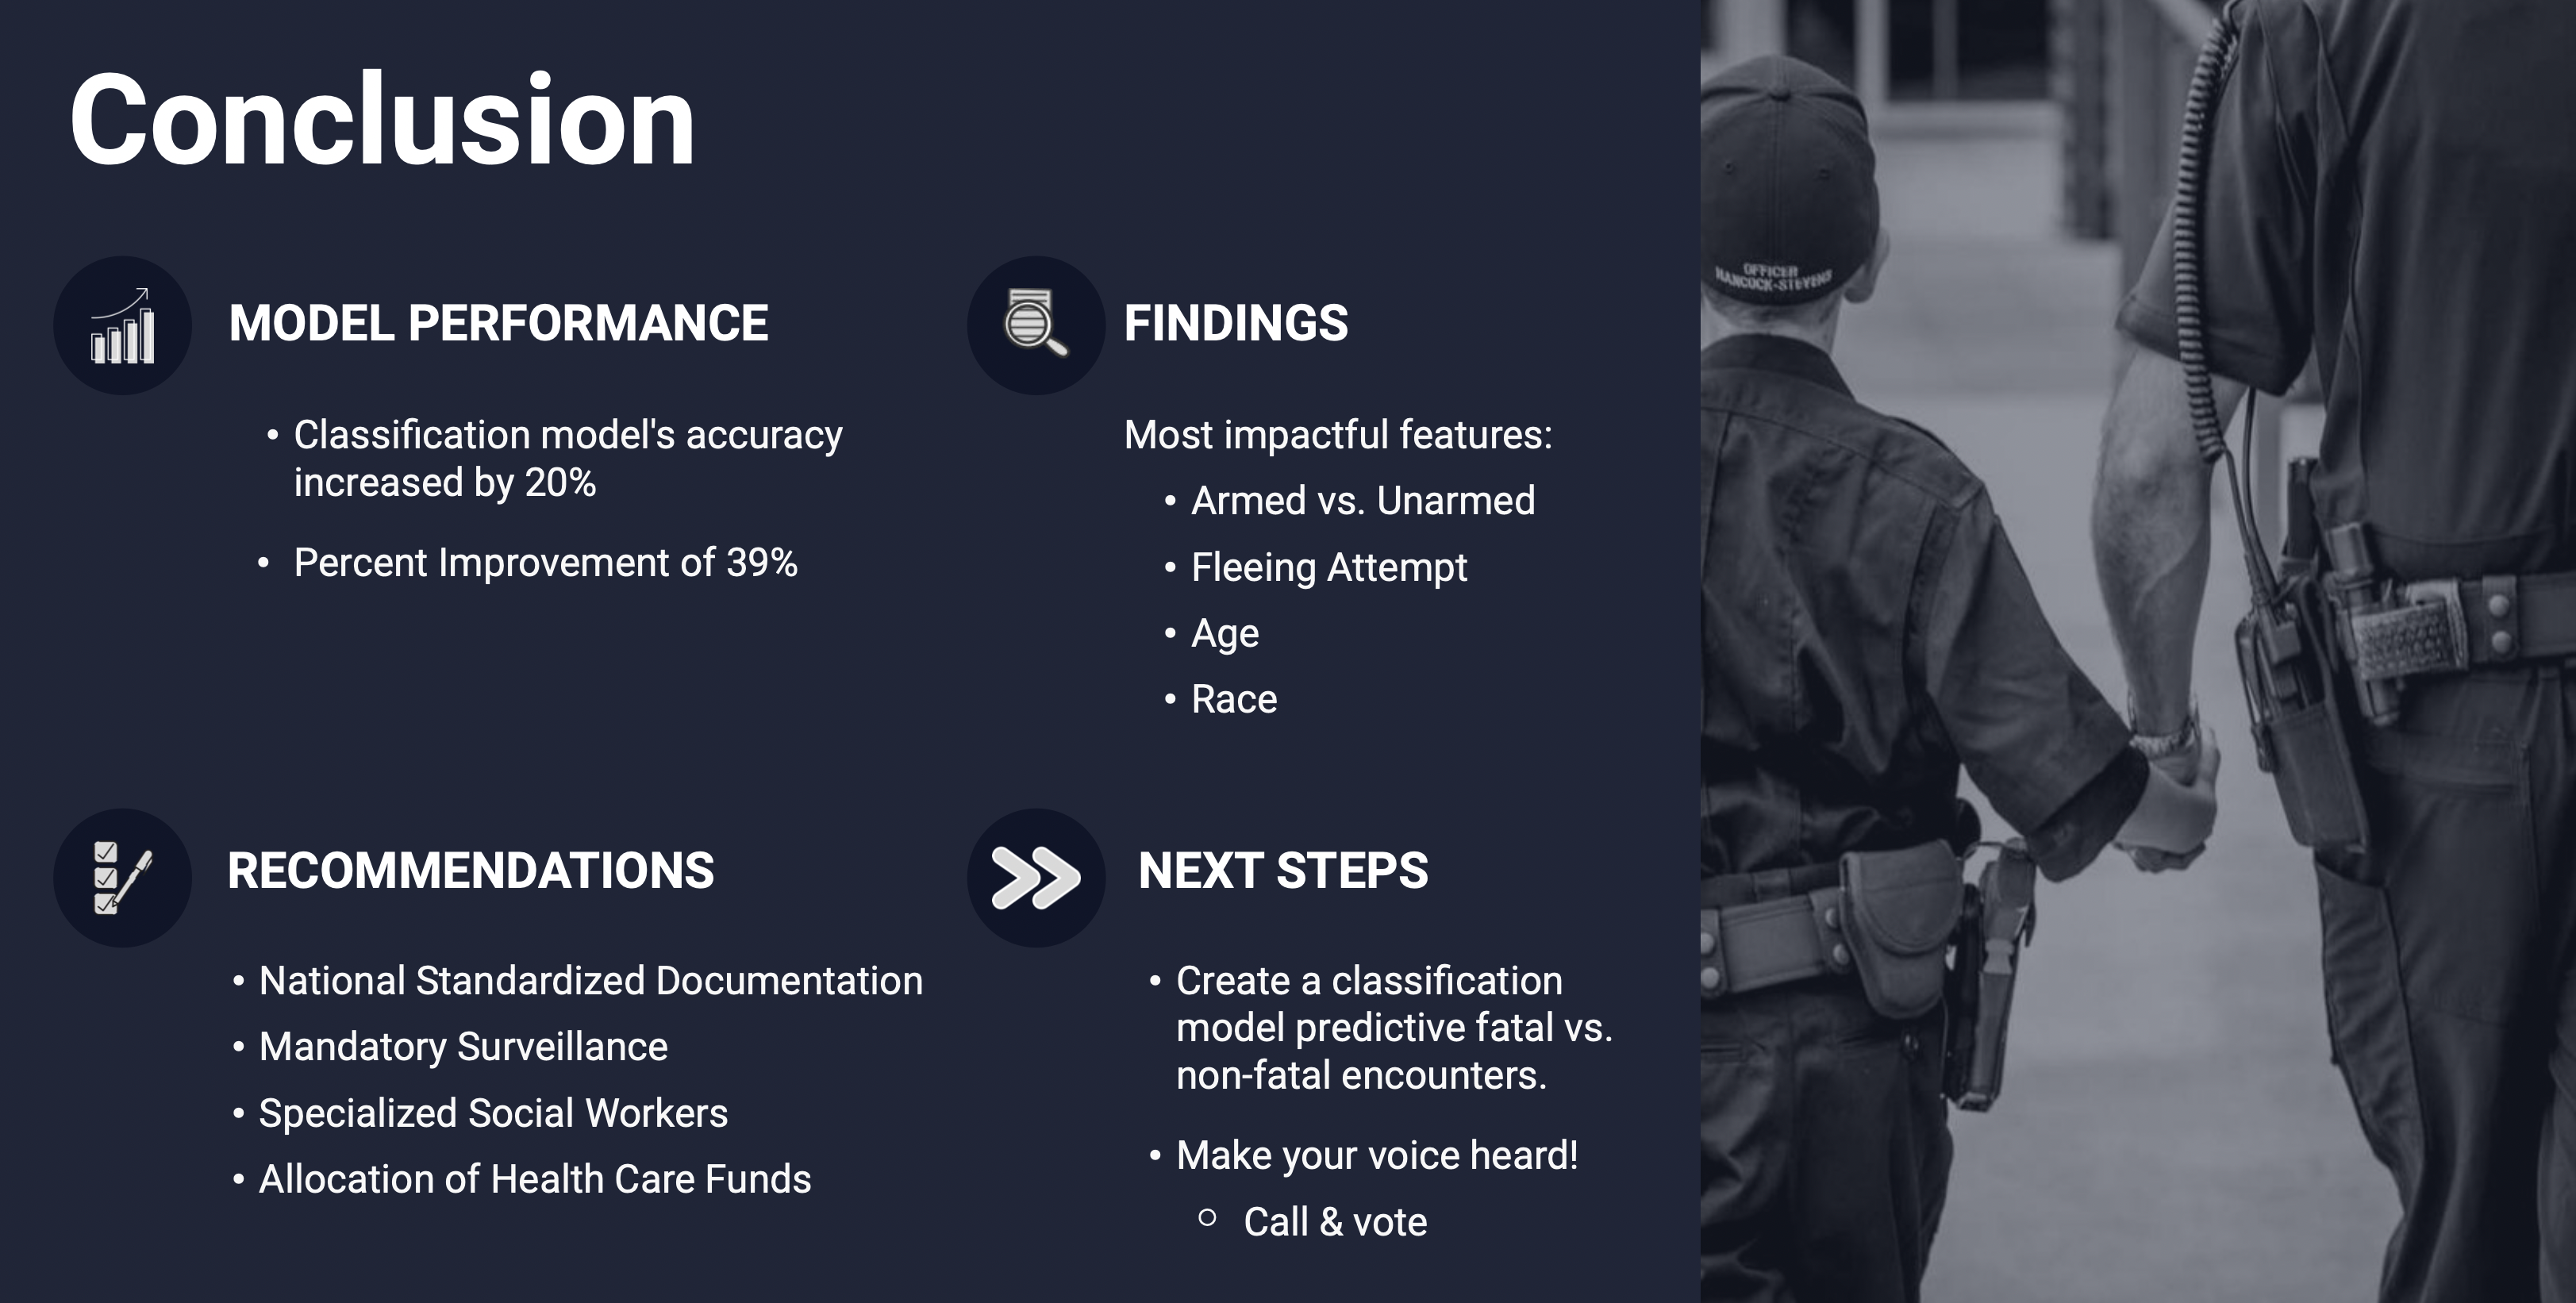

</a>



### Takeaways
- All models had roughly the same score for train and validate sets.
- K-Nearest neighbor model performed the worst on out-of-sample data.
- The best performing model uses a Random Forest algorithm and combined features from Select K Best and Recursive Feature Elimination lists.
- Our final Random Forest model increased by 21% from a baseline accuracy of 51% to 72% accuracy on out-of-sample data.


### Next Steps
- Fill in missing values manually as best as possible based on the description column in the dataset (large amount of data missing). 
- Natural language processing exploration on description of incident. 


#### Report containing summarization of notebook can be found [here](link to presentation).

[Jump to Table of Contents](#toc)

<a id='bottom'></a>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>